This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
# Importing necessary Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Checking the Datashape.
data.shape

(32560, 15)

In [5]:
# we have 32560 rows and 15 columns.

In [6]:
# To Check the Datashape information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# We can see  6 int columns and 09 objective columns.

In [8]:
#Information about the columns:
# Age column is about the age of civilians
# WorkClass column,To give information about their working companies
# Fnlwgt: The weight contribution of the independent 
# Education and Education num gives the Details of their educational qualification.
# Maritial status: status about the family.
# occupation: about the occupation status of the individual.
# Relationship status of the civilians.
# Race of the civilians 
# Sex of the individual civilians.
# capital gain and capital loss of the civilians is mentioned.
# Hours_per_week : no of working hours per week for the civilians.
# Income<=50k and income>=50k of the civilians. is distinguished ,and It is the output variable.

In [9]:
# To Check the Columns name.
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Data intergrity Check

In [10]:
# To Check Null Values.

data.isnull().sum()          

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [11]:
data.isnull().sum().sum()

0

In [12]:
# To check for widespace,special characters in the Dataset.

In [13]:
data.isin(['NA','n/a','-',',','?',' ']).any().sum()

0

In [14]:
# WE can see that there is no special characters in the Dataset.

In [15]:
data.duplicated().sum()

24

In [16]:
# To Check Any Duplicate Values are present:
data.drop_duplicates(inplace=True) # To Drop Duplicates.
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
data.reset_index() # after removing the duplicates,resetting the index.

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32532,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32533,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32534,32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:
# To Check the Number of Unique values present in the Dataset.
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

# Statistical summary

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


In [20]:
# Observations:
# The count remains same.
# The Mean and the STD is very high for Final wgt,skewness is present.
# Fnlwgt column is having outliers as well,as there is a huge difference between 75% and max.
# capital_gain only max values are present,will analyze further with EDA.

# Categorising columns before EDA. 

In [21]:
data.columns


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [22]:
data_numerical=data[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].copy()
data_numerical

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [23]:
data_cat=data[['Workclass','Education','Marital_status','Occupation', 'Relationship', 'Race', 'Sex','Native_country']].copy()
data_cat

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


# Univariate Analysis

In [24]:
data_cat.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country'],
      dtype='object')

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


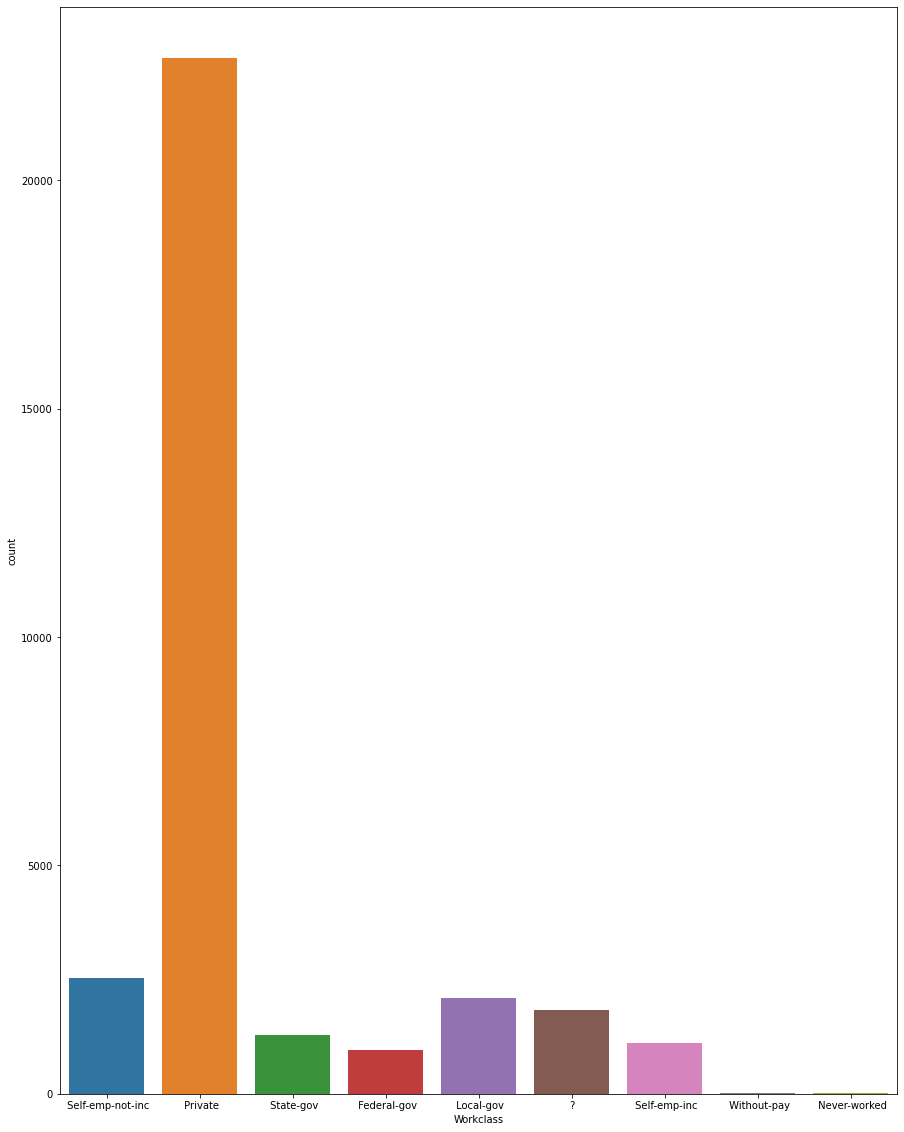

In [25]:
plt.figure(figsize=(15,20))
sns.countplot(x=data['Workclass'])
print(data['Workclass'].value_counts())

In [26]:
# We observed that there are more civilians in the Private sectors only.
# There are 1836 values with Unknown thing ,willreplace the same as 'Unknown'


In [27]:
data['Workclass']=data_cat['Workclass']
data
data['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [28]:
# Replacing the special character of the column with Mode of the Same.
data['Workclass']=data['Workclass'].str.replace('?','Unknown')
data['Workclass']

0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32536, dtype: object

In [29]:
#Rechecking the Same after replaced.
data['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 Unknown              1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


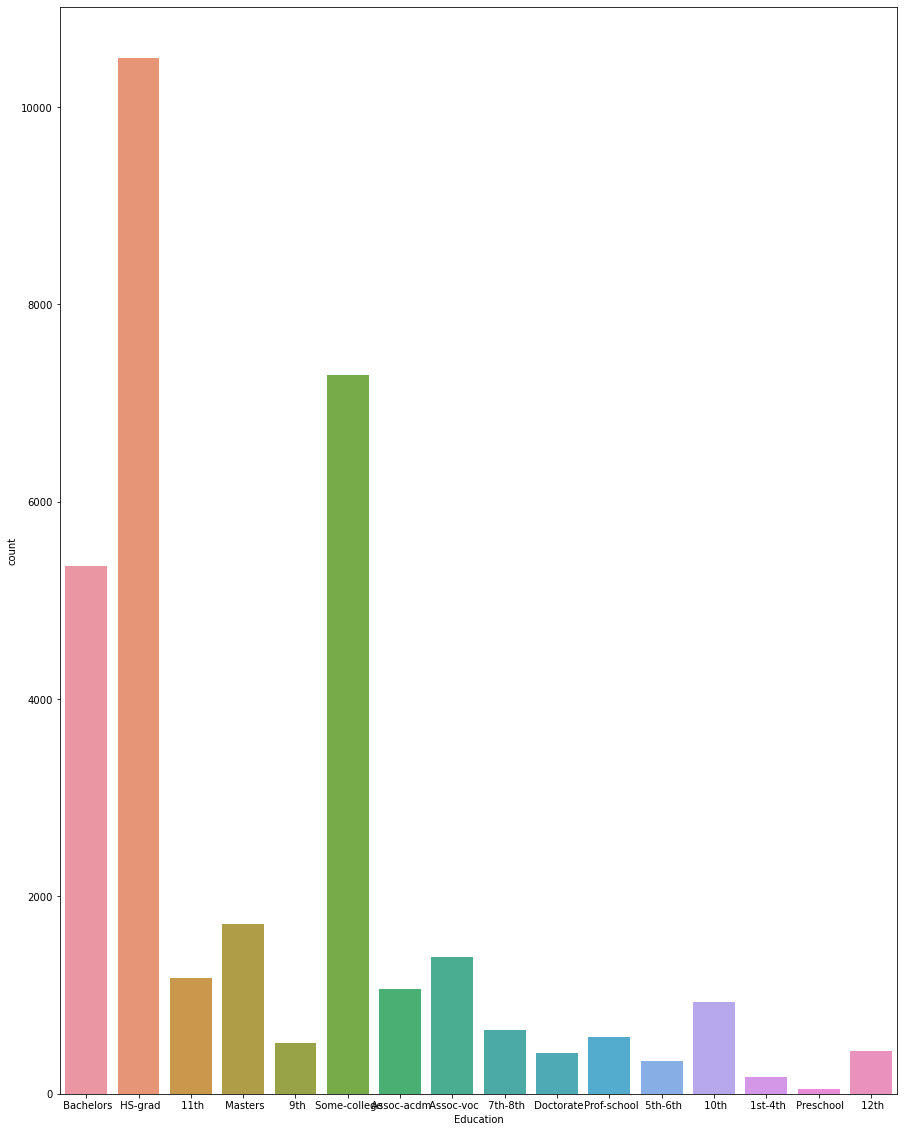

In [30]:
plt.figure(figsize=(15,20))
sns.countplot(x=data['Education'])
print(data['Education'].value_counts())

In [31]:
# observations:
# Most of the civilians are Hs-grad.
# very less civiliansin the preschool category. 

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


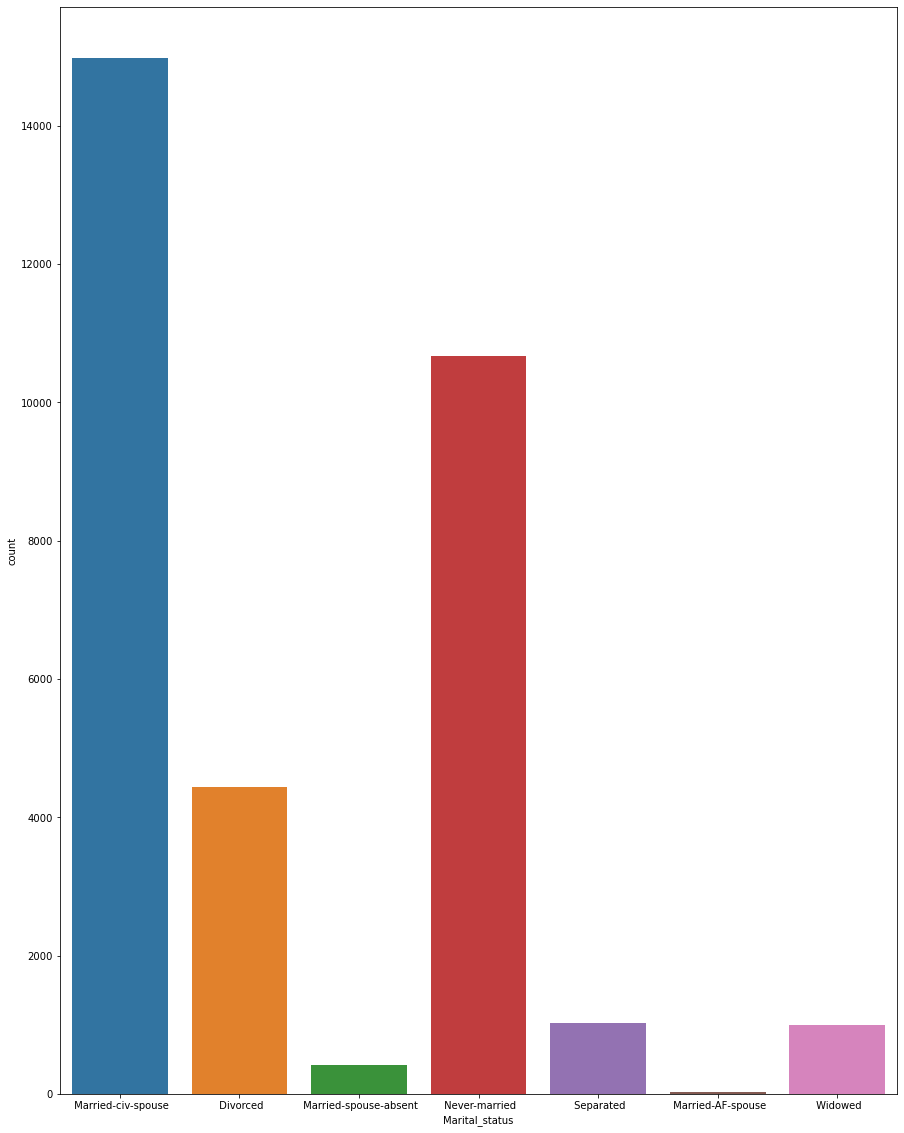

In [32]:
plt.figure(figsize=(15,20))
sns.countplot(x=data['Marital_status'])
print(data['Marital_status'].value_counts())

In [33]:
# observations:
# Highest oberved catergory is in Married_civ_spouse
# Lowest observed category is Married_AF-Spouse

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


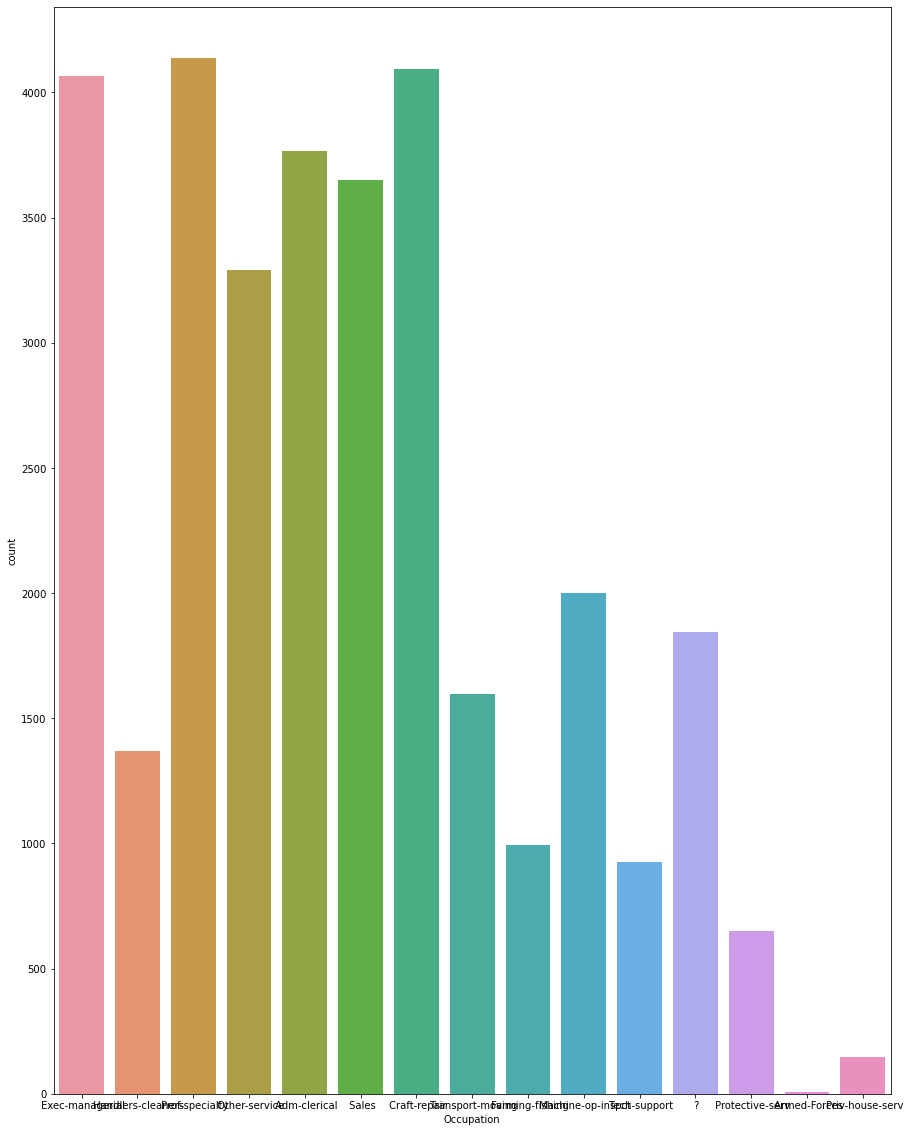

In [34]:
plt.figure(figsize=(15,20))
sns.countplot(x=data['Occupation'])
print(data['Occupation'].value_counts())

In [35]:
# observations:
# Highest is observed in the Prof-Speciality Occupation.
#lowest is observed in the Armed Force category.
                                                 

In [36]:
# replacing the str character to Unknown.
data['Occupation']=data['Occupation'].str.replace('?','Unknown')
data['Occupation']




0           Exec-managerial
1         Handlers-cleaners
2         Handlers-cleaners
3            Prof-specialty
4           Exec-managerial
                ...        
32555          Tech-support
32556     Machine-op-inspct
32557          Adm-clerical
32558          Adm-clerical
32559       Exec-managerial
Name: Occupation, Length: 32536, dtype: object

In [37]:
# After replacing,checking the value counts.
data['Occupation'].value_counts()


 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Unknown              1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


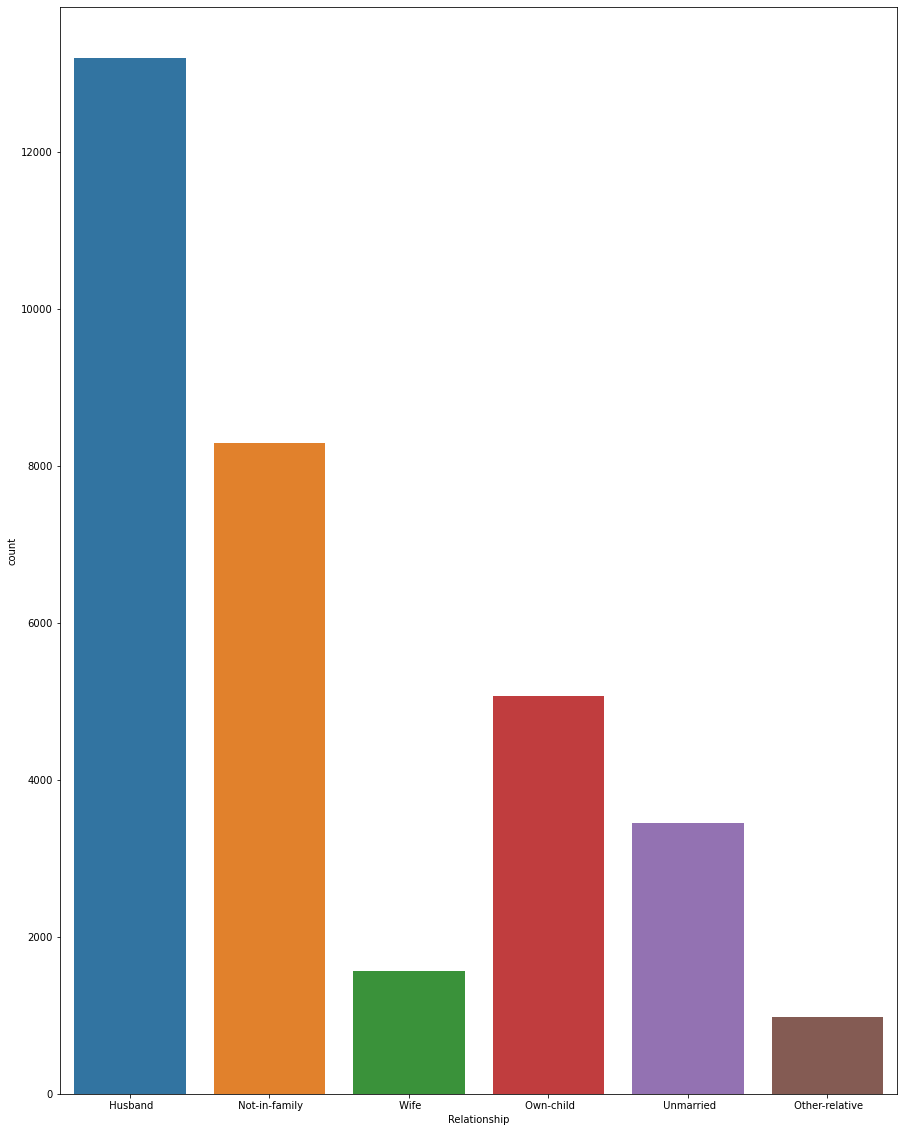

In [38]:
plt.figure(figsize=(15,20))
sns.countplot(x=data['Relationship'])
print(data['Relationship'].value_counts())

In [39]:
# increased census is in the relationship husband
# and the lowest is Other-relative.

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


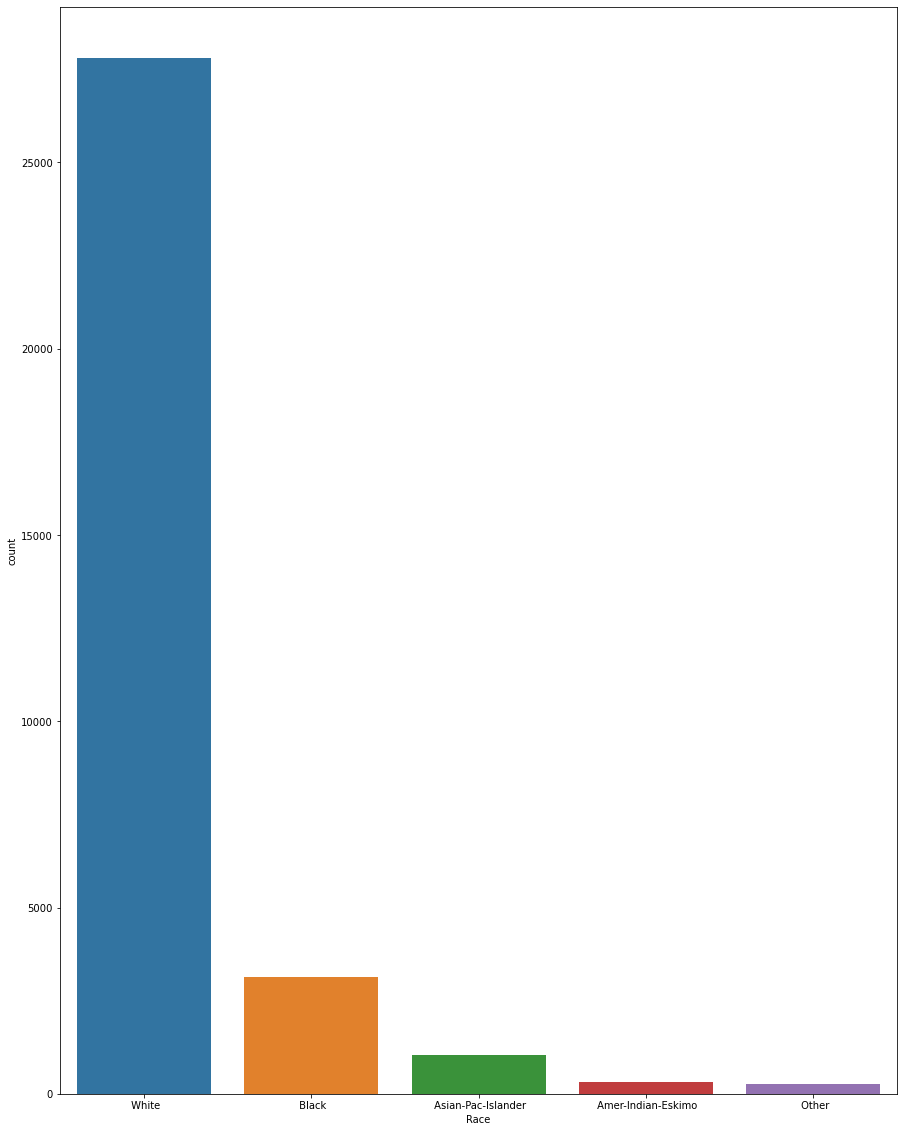

In [40]:
plt.figure(figsize=(15,20))
sns.countplot(x=data['Race'])
print(data['Race'].value_counts())

In [41]:
# The highest in Race is 'white'
# the lowest in Race is'Other'.

 Male      21774
 Female    10762
Name: Sex, dtype: int64


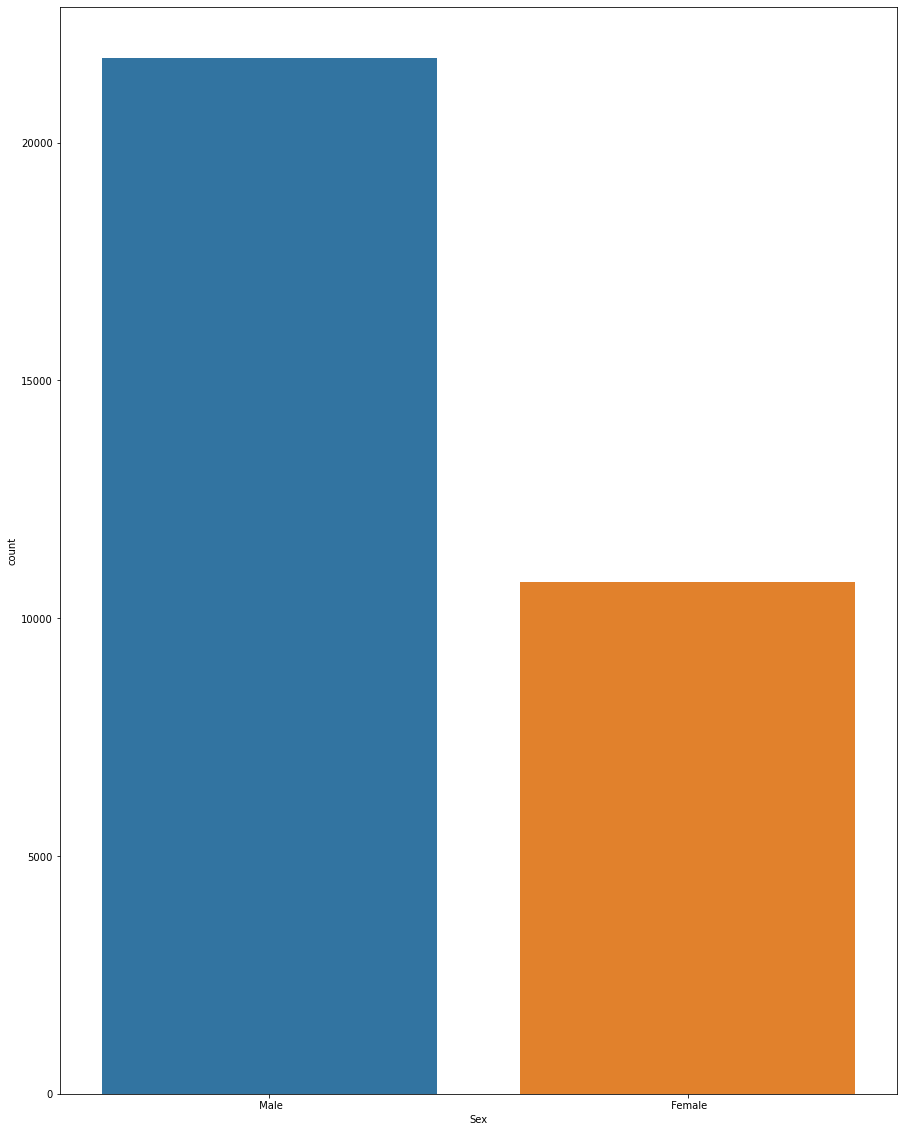

In [42]:
plt.figure(figsize=(15,20))
sns.countplot(x=data['Sex'])
print(data['Sex'].value_counts())

In [43]:
# male contribution is High comparitavely to Female.

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

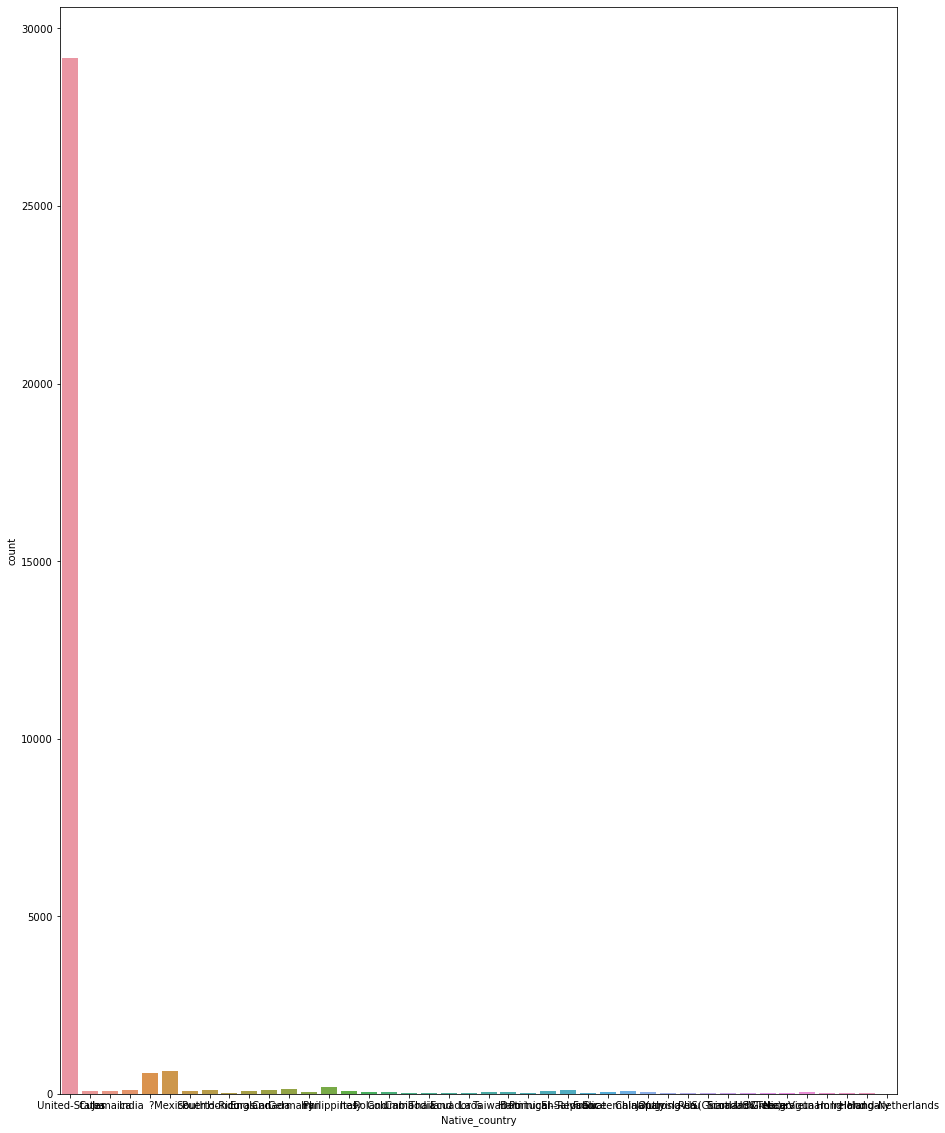

In [44]:
plt.figure(figsize=(15,20))
sns.countplot(x=data['Native_country'])
print(data['Native_country'].value_counts())

In [45]:
#The Highest in Native country is US
# The Lowest in Native country is Holand.

In [46]:
# Replacing the Special charcter with Unknown.
data['Native_country']=data['Native_country'].str.replace('?','Unknown')
data['Native_country']

0         United-States
1         United-States
2         United-States
3                  Cuba
4         United-States
              ...      
32555     United-States
32556     United-States
32557     United-States
32558     United-States
32559     United-States
Name: Native_country, Length: 32536, dtype: object

In [47]:
# After replacing,checking the Value_counts 
data['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 Unknown                         582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

# Visualizing the TargetColumn

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


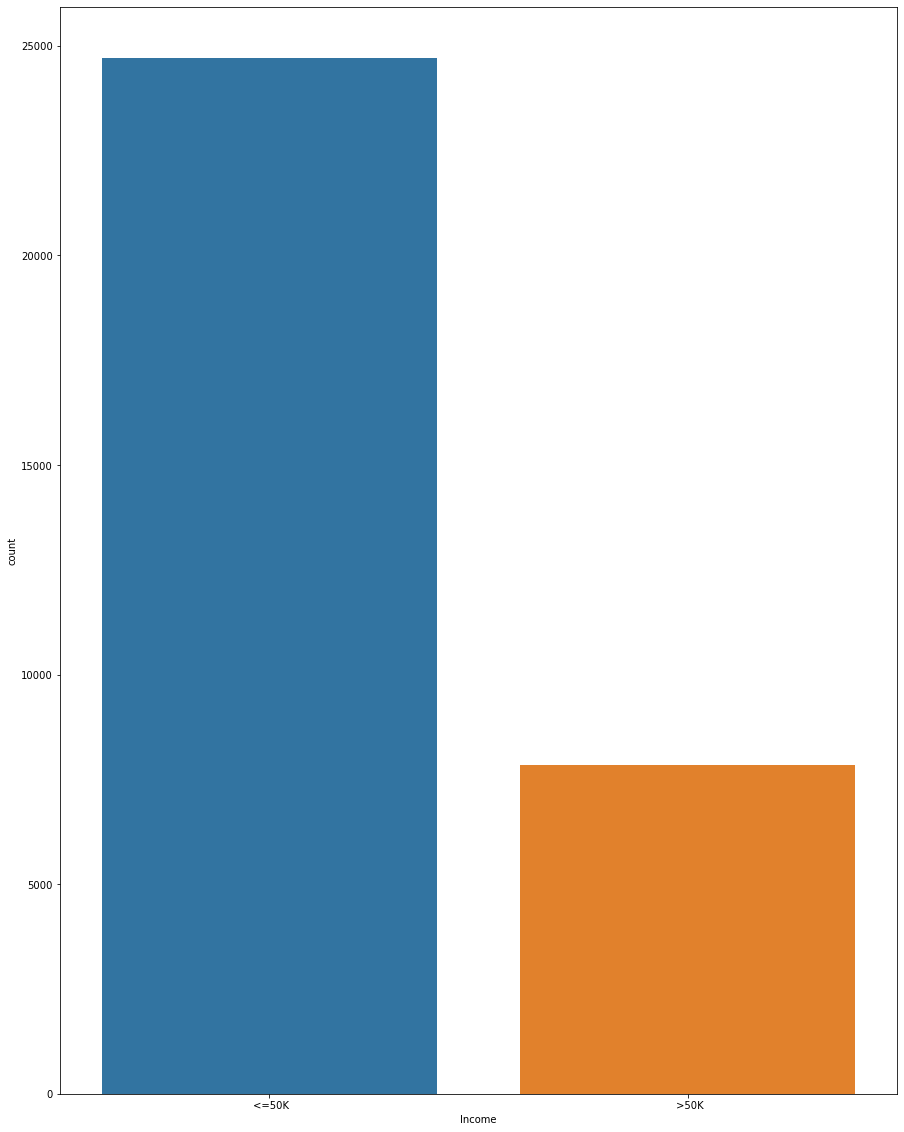

In [48]:
plt.figure(figsize=(15,20))
sns.countplot(x=data['Income'])
print(data['Income'].value_counts())

In [49]:
# we have 2 values;<=50k is the highest with 24697 civilians. and the lowest is >50k with 7839
# our classes are not  balanced,will do in a while ,replacing the values,<=50k as 0 and >50k as 1.

In [50]:
data['Income']=data['Income'].str.replace('<=50K','0')
data['Income']

0            0
1            0
2            0
3            0
4            0
         ...  
32555        0
32556     >50K
32557        0
32558        0
32559     >50K
Name: Income, Length: 32536, dtype: object

In [51]:
data['Income']=data['Income'].str.replace('>50K','1')
data['Income']

0         0
1         0
2         0
3         0
4         0
         ..
32555     0
32556     1
32557     0
32558     0
32559     1
Name: Income, Length: 32536, dtype: object

In [52]:
# After replacing the values,rechecking the value_counts.
data['Income'].value_counts()

 0    24697
 1     7839
Name: Income, dtype: int64

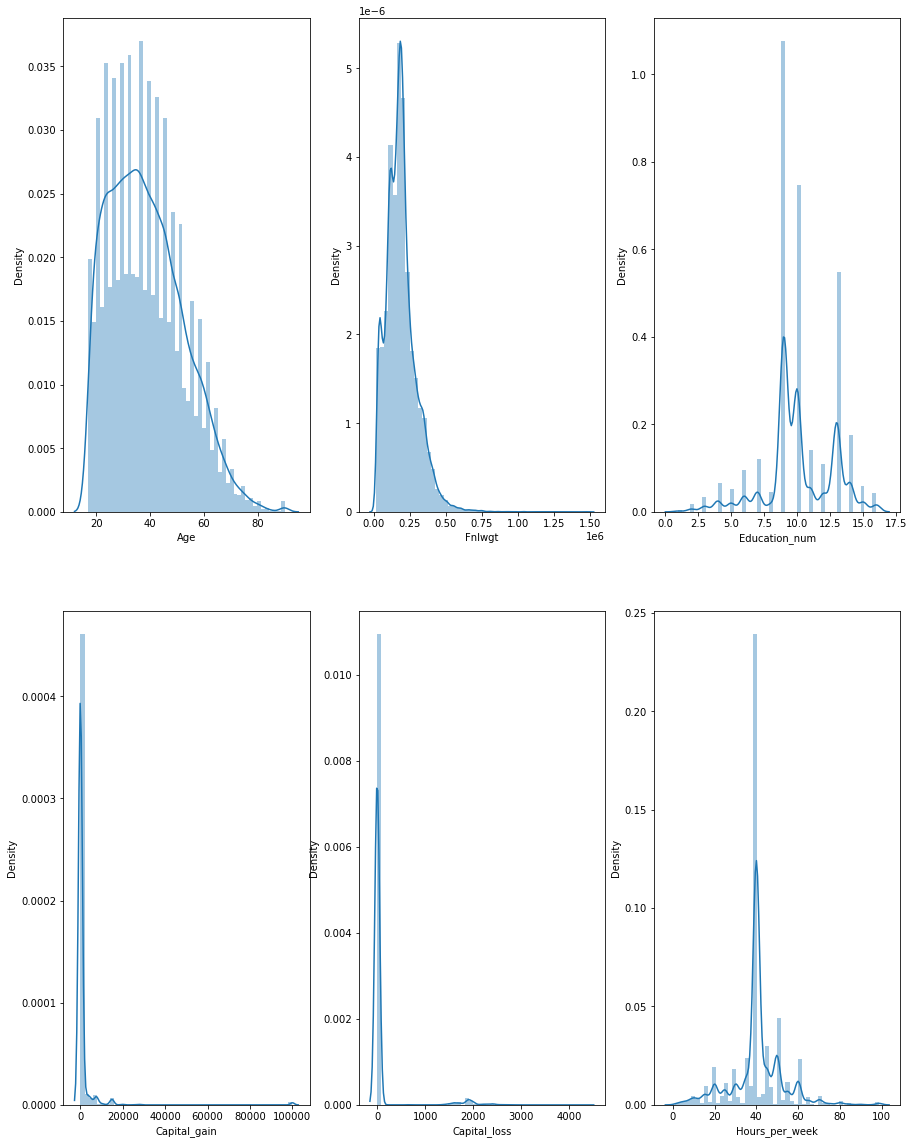

In [53]:
plt.figure(figsize=(15,20))
plotnumber=1
for columns in data_numerical:
    if plotnumber<=6:
        plt.subplot(2,3,plotnumber)
        ax=sns.distplot(x=data_numerical[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.show()




In [54]:
#observations:
# Age : Normal distribution is there
# Fnlwgt: normal distribution from 0 to 0.75 and then right skewed.
# Education_num :Data is scattered.
# Capital_gain: Normal Distribution from 0 t0 15000 and then right skewed.
# Capital_Loss: right skewness is present in the column.
# Hours_per_week,the Data is scattered.

# Bivariate Analysis.

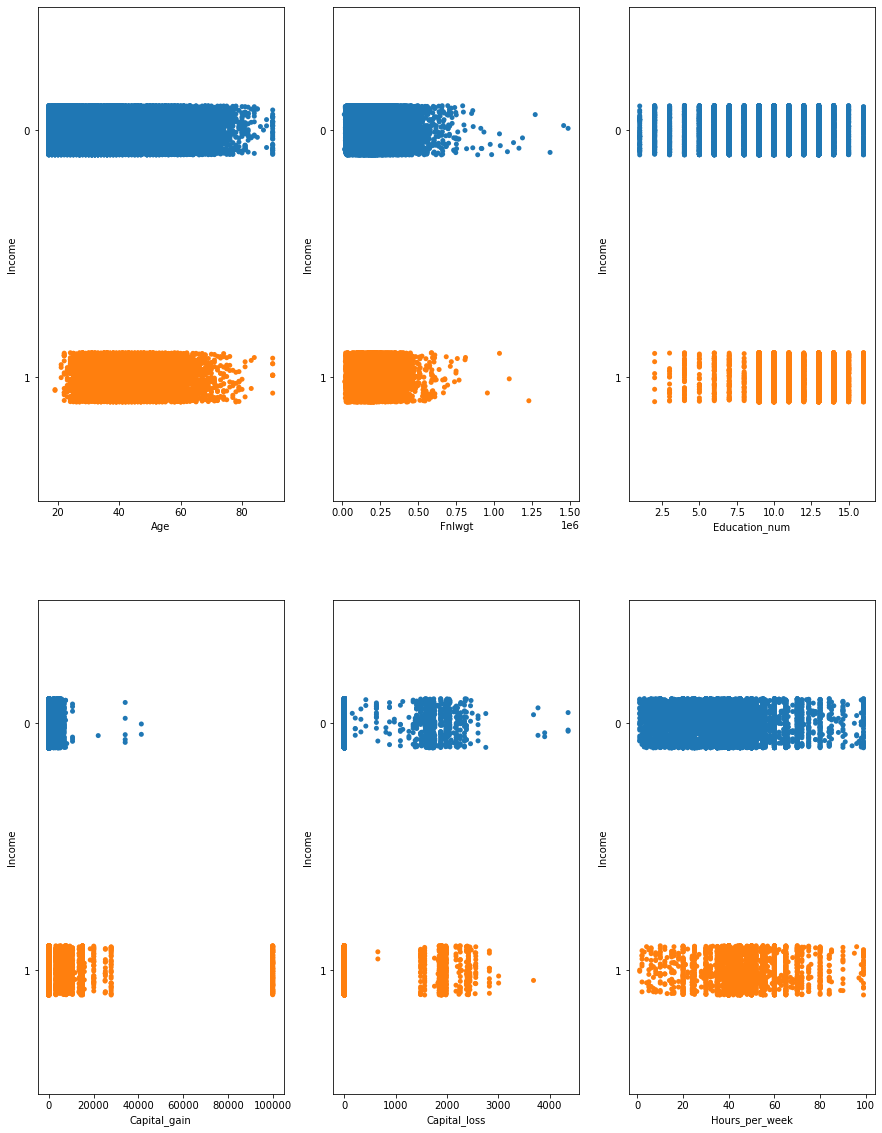

In [55]:
# checking the relationship of the numerical columns with Target variable.
plt.figure(figsize=(15,20))
plotnumber=1
for columns in data_numerical:
    if plotnumber<=6:
        plt.subplot(2,3,plotnumber)
        ax=sns.stripplot(y=data['Income'],x=data_numerical[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.show()

In [56]:
#observations:
# as the age increases, o(<=50k)  increases
# if the fnlwgt  from o to 0.75 ,we will get (0(<=50k)and 1 (>50k)),if its increases,Most of the values are in 0(<=50K)
# Education _Num no trend is seen,data is scattered.
# Capital_gain is from 0 to 40000,both 0 and 1 are there.if it went high,>50k income will be there.
# Capital_Loss increases,their income(decreases(<=50k))
# Hores_per_week ,The data is scattered.


In [57]:
data_cat.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country'],
      dtype='object')

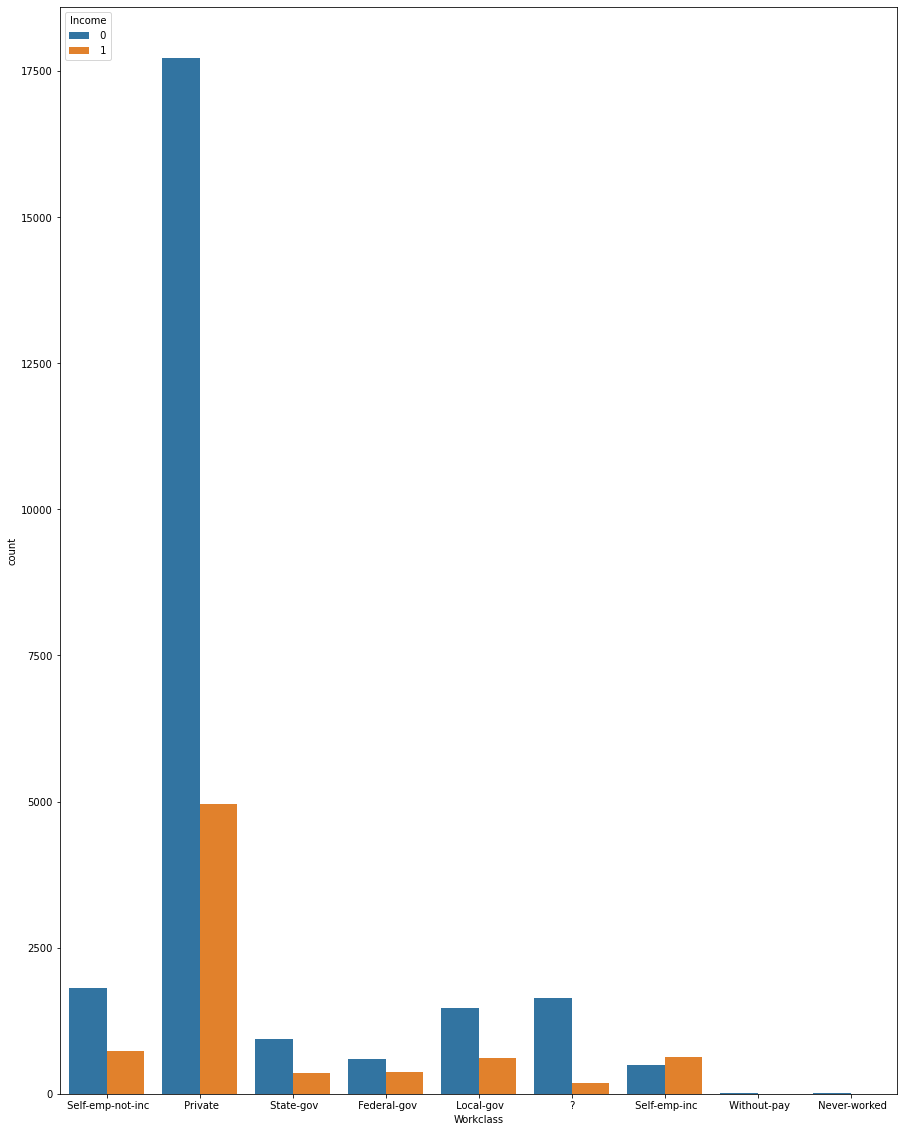

In [58]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['Workclass'],hue=data['Income'])
plt.show()
              

In [59]:
# private sector people have given <=50k income .
# self emp_inc sector people have given>50k income

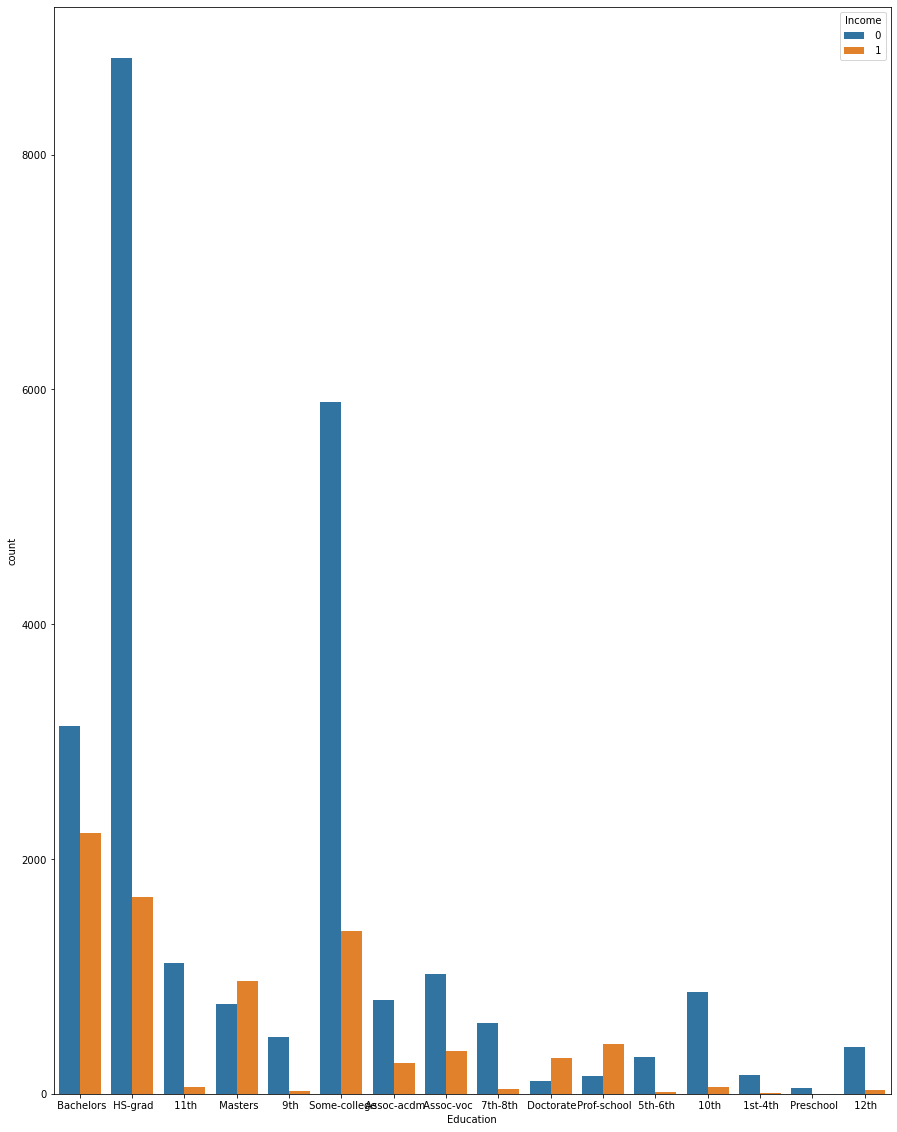

In [60]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['Education'],hue=data['Income'])
plt.show()

In [61]:
# Observations:
# Doctorate and Prof-School are giving income>50k
# Bachelors column : we see more people are giving only <=50k income.
# Hs-grad  column: Most of them give only <=50k 
# 11th : Most of them give only <=50k
# Masters column: Most of them give only >50k income
# 9th  : Very less getting >50k.


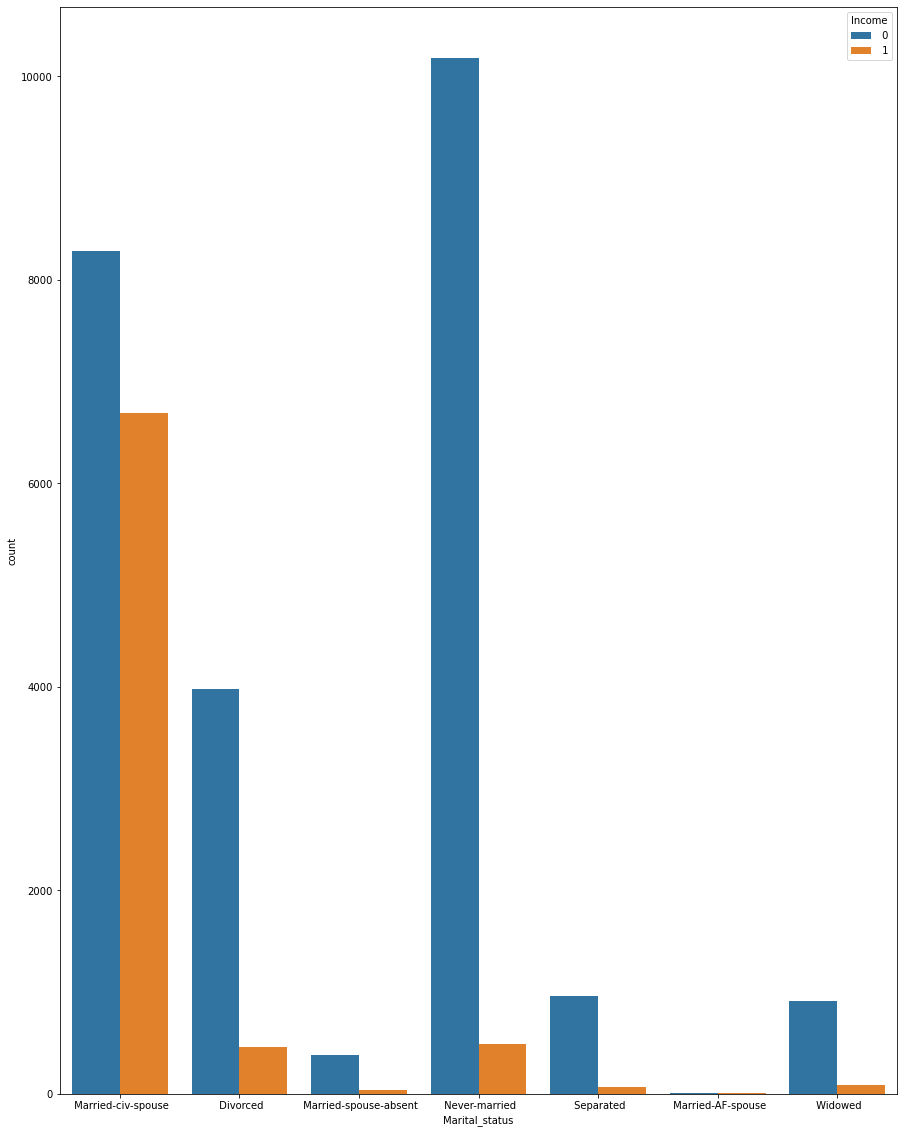

In [62]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['Marital_status'],hue=data['Income'])
plt.show()

In [63]:
# Married_civ_spouse: Most of them give <=50 k income
# Divorced: Most of themgive <=50k income
# Married-Spouse-absent: Most of themgive<=50k income
# Never-Married: Most of themgive <=50k income
# Seperated: Most of them give <=50k income

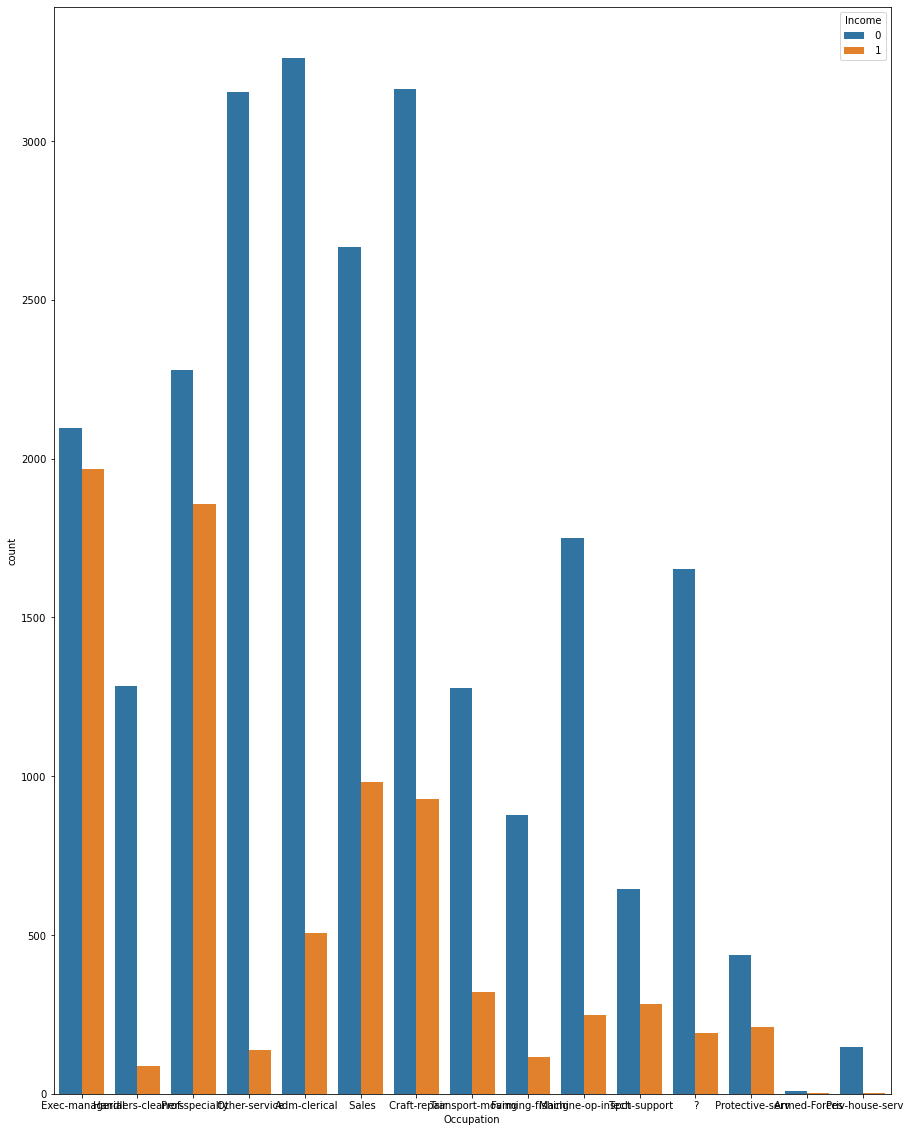

In [64]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['Occupation'],hue=data['Income'])
plt.show()

In [65]:
# observations:
#Exec-manag column: both <=50k income and>50 k income also 

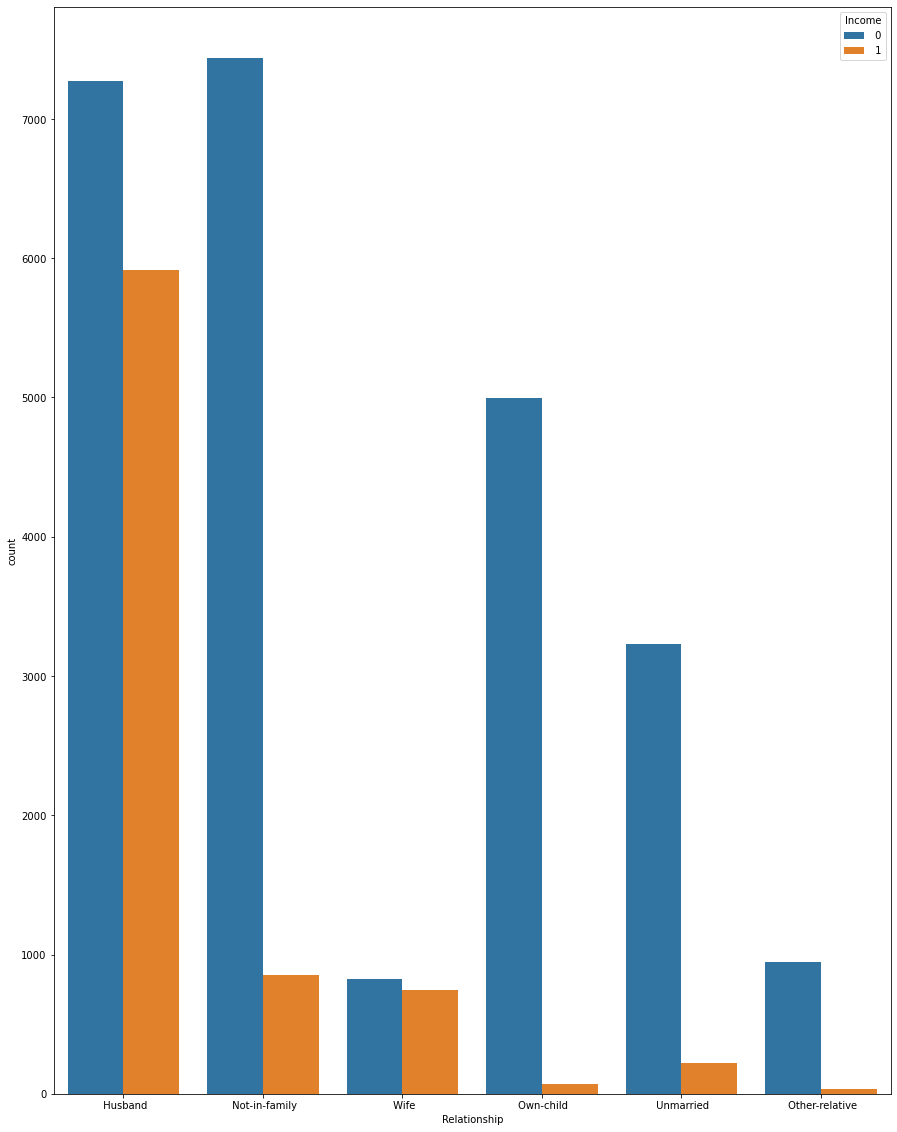

In [66]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['Relationship'],hue=data['Income'])
plt.show()

In [67]:
# The Category Husband in the relationship is giving <=50k and >50k also.
#Not_in Family: Majority of them give <=50k income only.
# Wife : some of them giving <=50k and some giving >50 k also.
# Unmarried,own child ,other-relative columns:Most of them give only <=50k income.

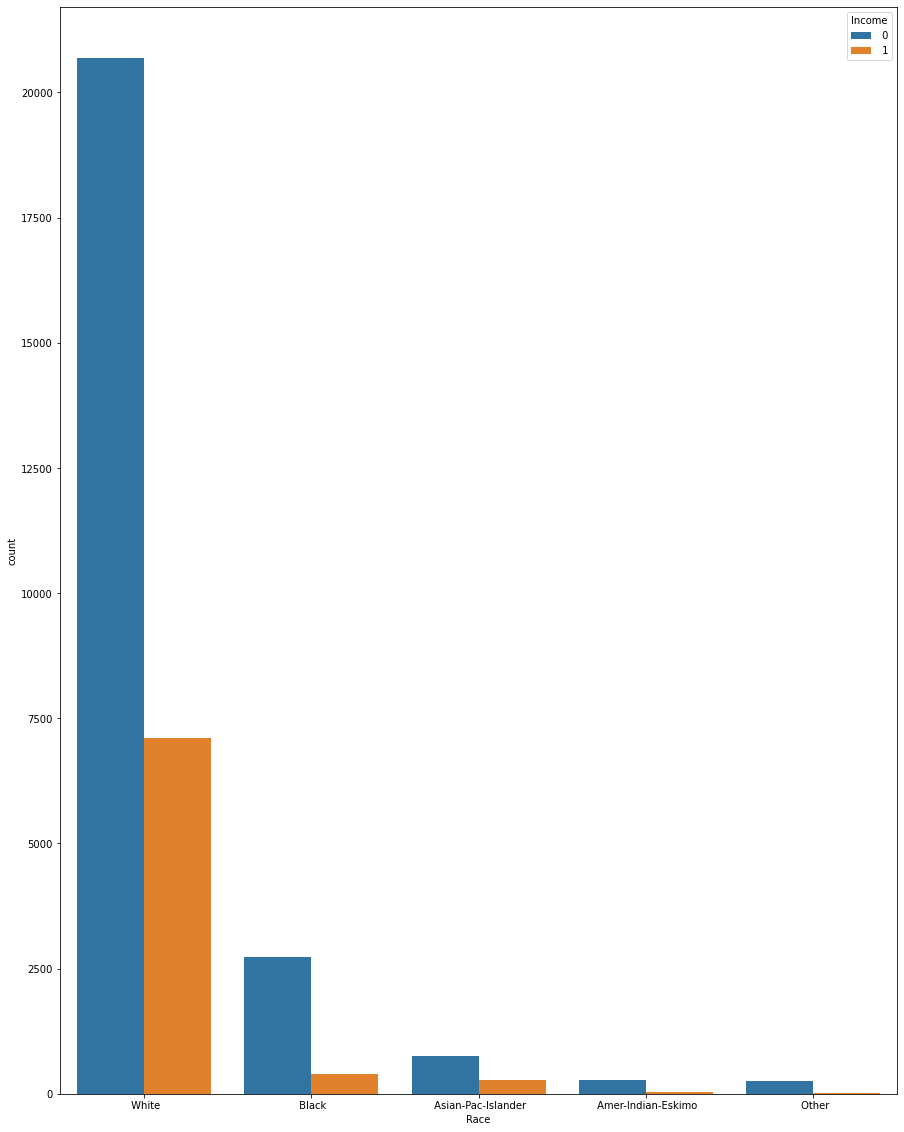

In [68]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['Race'],hue=data['Income'])
plt.show()

In [69]:
#observations:
# white: Most of them giving<=50k and in range 7000 people give >50 k as their income.
# Black: Most of themgive only <=50k income.

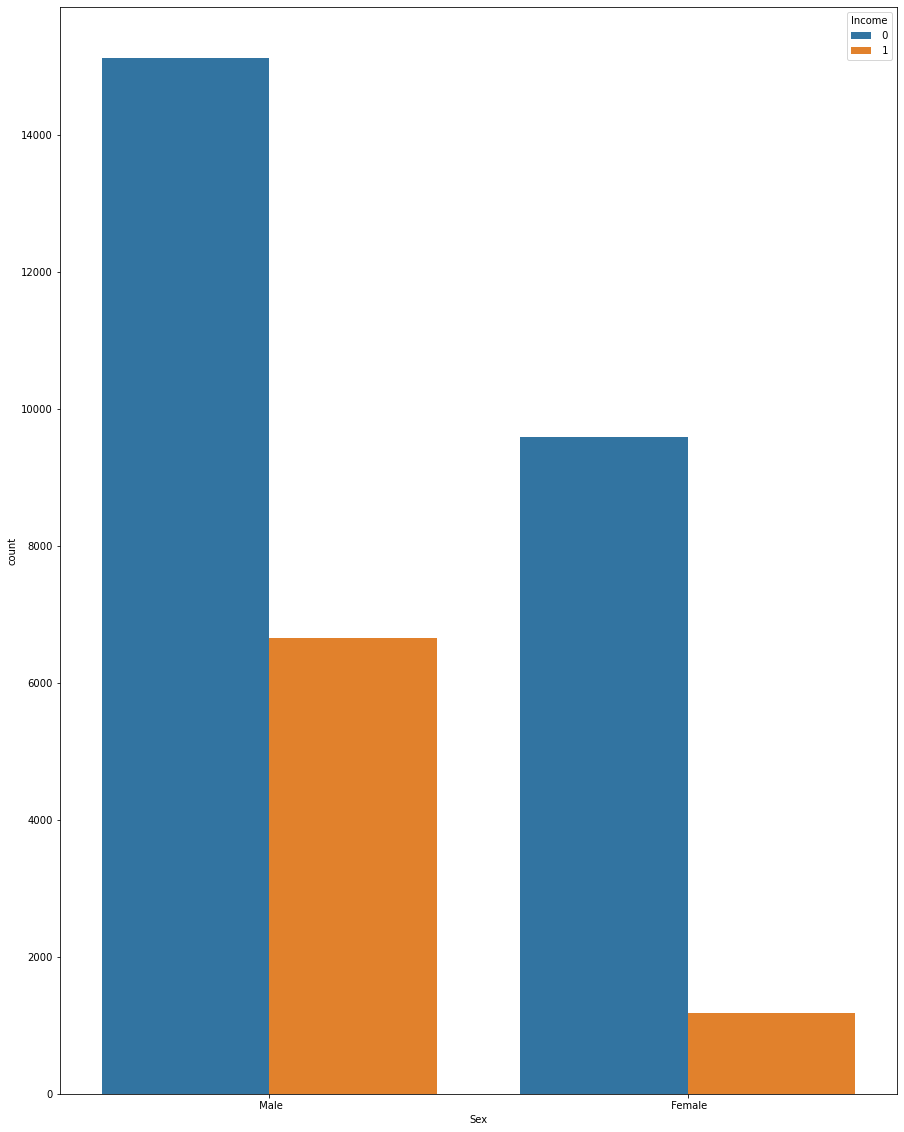

In [70]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['Sex'],hue=data['Income'])
plt.show()

In [71]:
# Male is the one with lot of count of giving >50 k income.

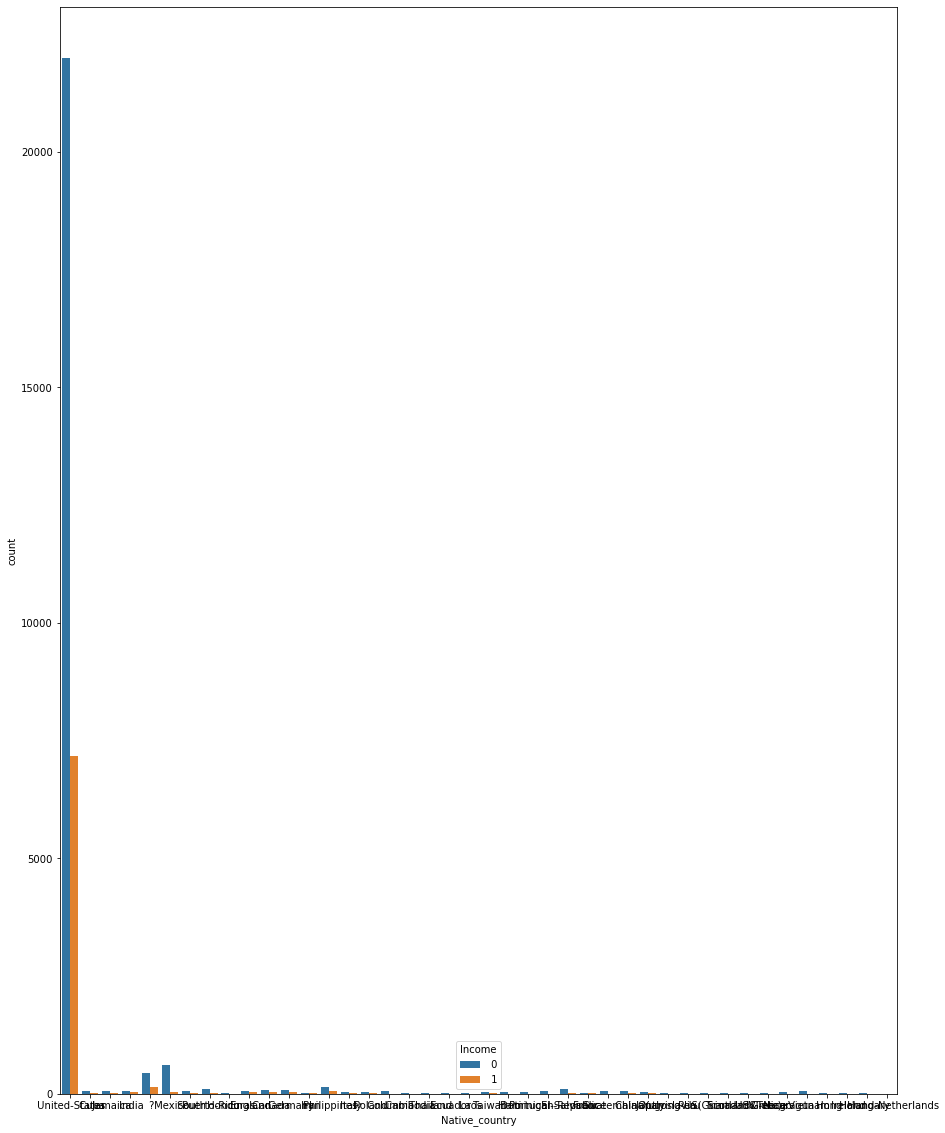

In [72]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['Native_country'],hue=data['Income'])
plt.show()

In [73]:
# United State is a native country with 0<=50k income as the highest ,as well 1>50k as the highest.

# Multivariate Analysis.

In [74]:
data_cat.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country'],
      dtype='object')

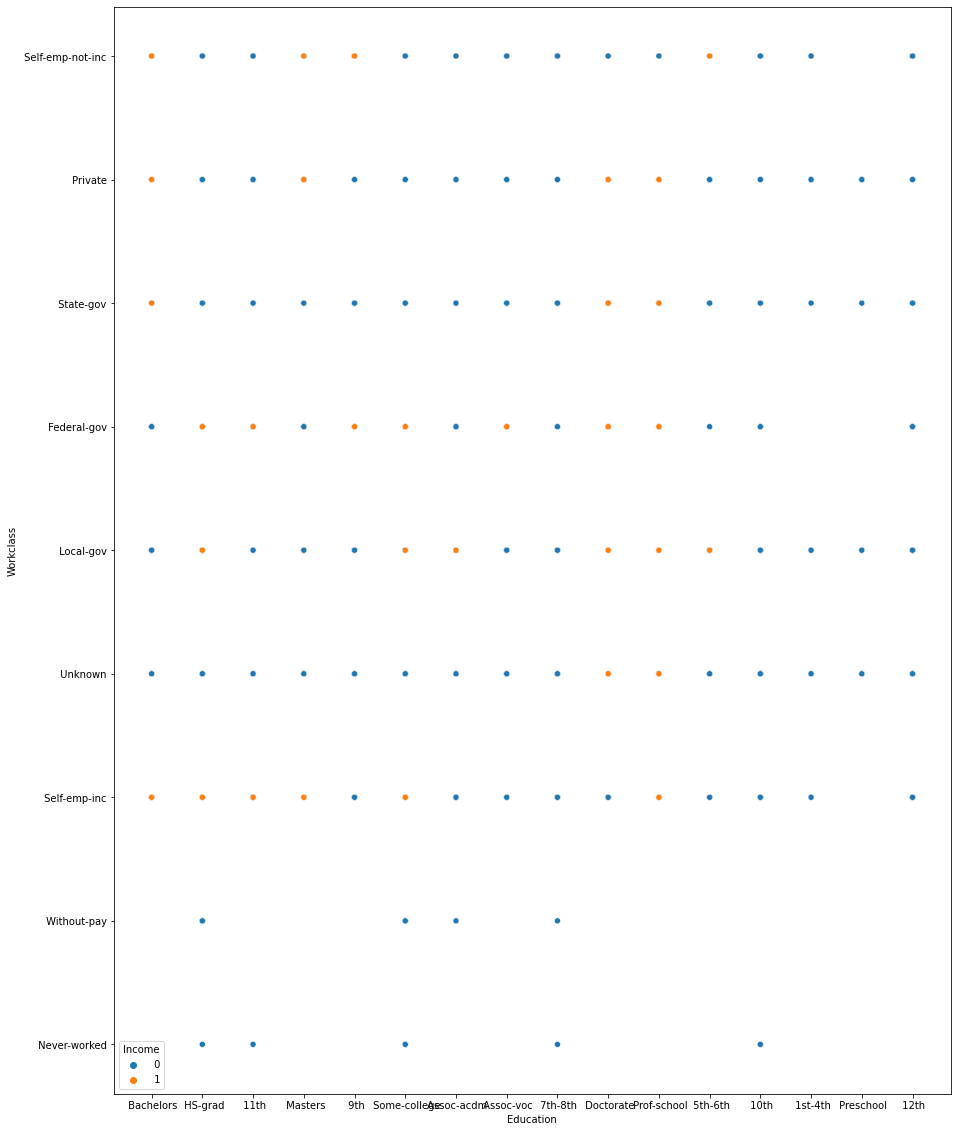

In [75]:
# comparing Workclass,education with 
plt.figure(figsize=(15,20))
sns.scatterplot(x='Education',y='Workclass',hue='Income',data=data)
plt.show()

In [76]:
#observations:
#Most of the Doctorate Profession in different workclass category have given (1>50k) income.

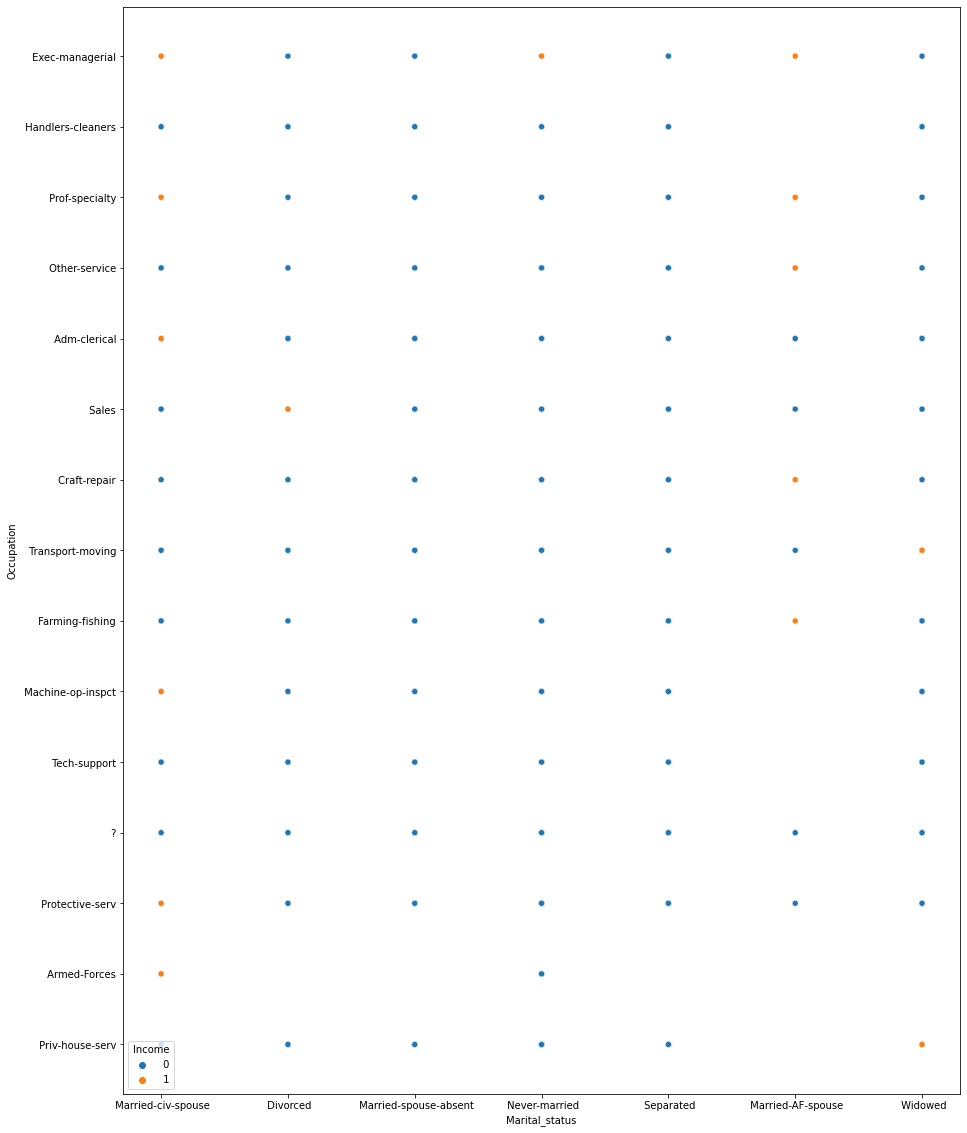

In [77]:
plt.figure(figsize=(15,20))
sns.scatterplot(x=data_cat['Marital_status'],y=data_cat['Occupation'],hue=data['Income'])
plt.show()

In [78]:
# Married-AF -spouse in most of the occupation gives >50 k as their income.

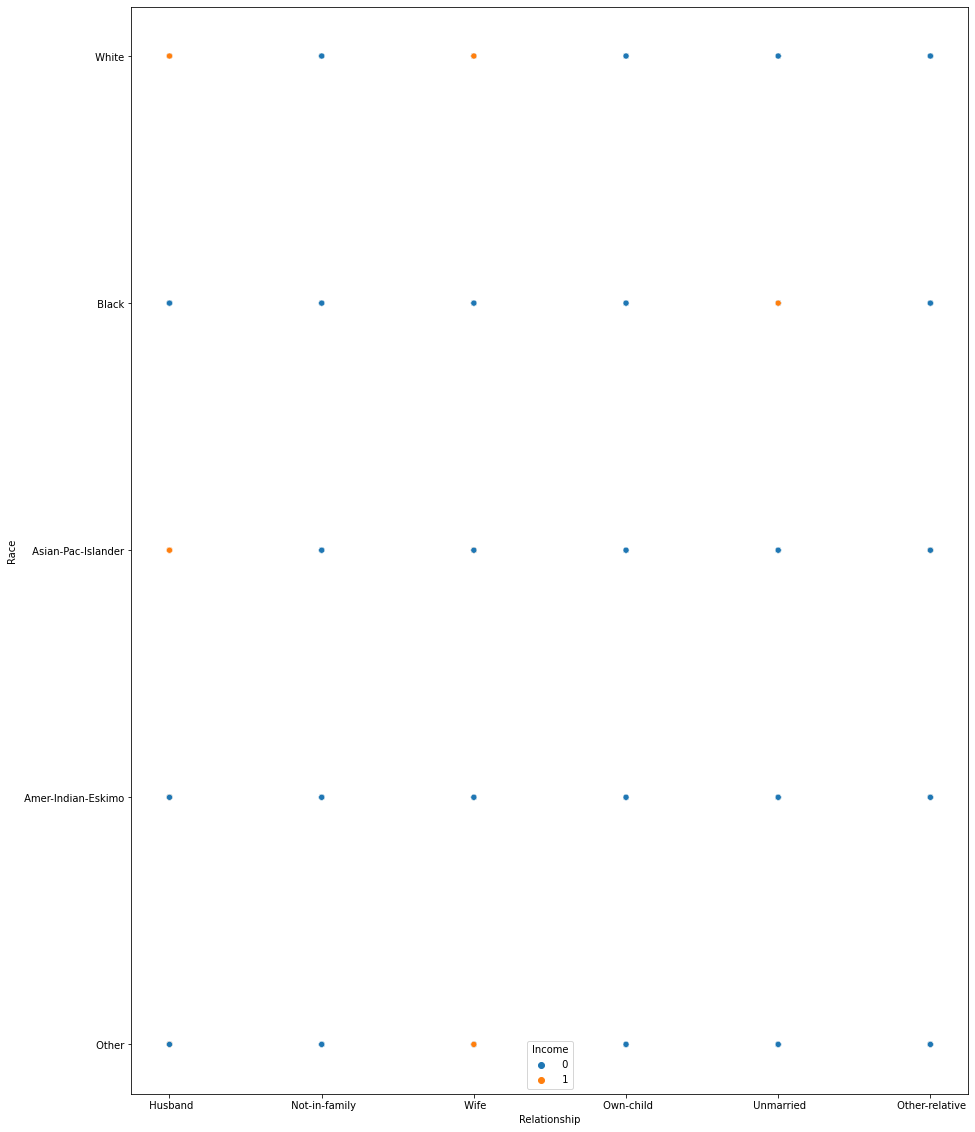

In [79]:
plt.figure(figsize=(15,20))
sns.scatterplot(x='Relationship',y='Race',hue='Income',data=data)
plt.show()

In [80]:
# Data is scattered in racisit and relationship.
#white people who have Husband and wife relationship have given (1>50 k) income.

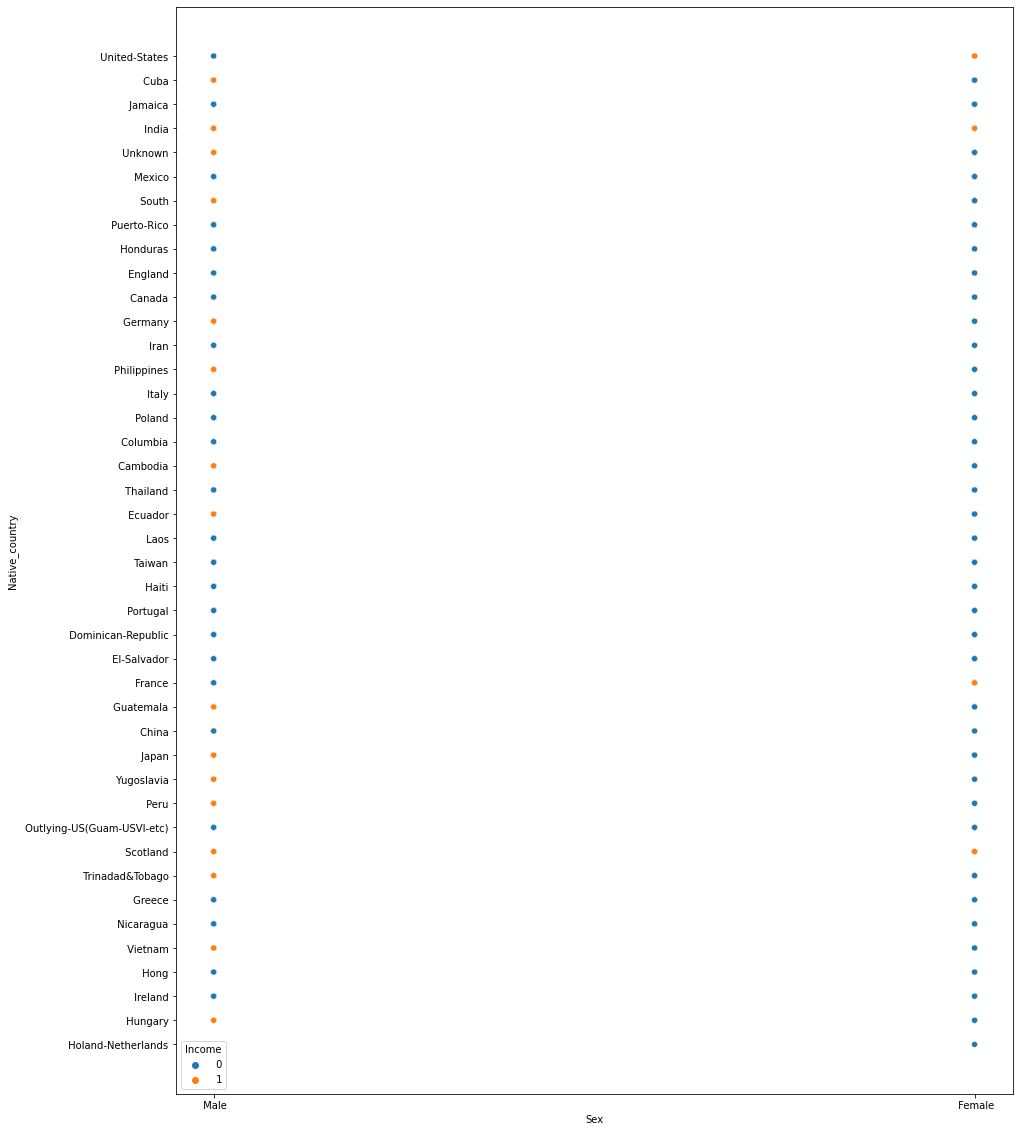

In [81]:
plt.figure(figsize=(15,20))
sns.scatterplot(x='Sex',y='Native_country',hue='Income',data=data)
plt.show()

In [82]:
# Observations:
#Male in most of the Native_country is having (1>50k)as their income.
#female(scotland,India,France,Unitedstates have given 1>50K as their income )

# Relationship  within numerical_features

In [83]:
data_numerical.columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

<Figure size 1080x720 with 0 Axes>

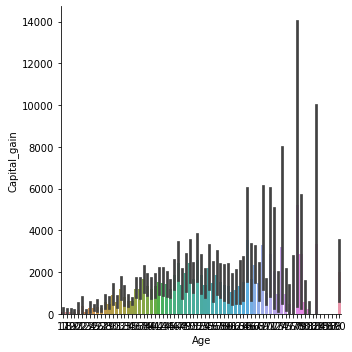

In [84]:
plt.figure(figsize=(15,10))
sns.catplot(x='Age',y='Capital_gain',data=data,kind='bar')
plt.show()

In [85]:
#increaing trend in Age and Capital_gain


<Figure size 360x720 with 0 Axes>

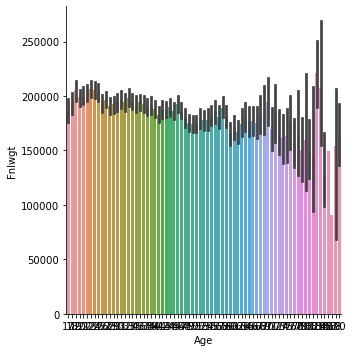

In [86]:
plt.figure(figsize=(5,10))
sns.catplot(x='Age',y='Fnlwgt',data=data,kind='bar')
plt.show()

<Figure size 1080x720 with 0 Axes>

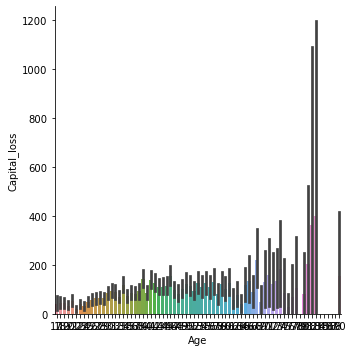

In [87]:
plt.figure(figsize=(15,10))
sns.catplot(x='Age',y='Capital_loss',data=data,kind='bar')
plt.show()

# Encoding categorical colums.


In [88]:
data_cat.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country'],
      dtype='object')

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
le=LabelEncoder()

In [91]:
for i in data_cat.columns:
    data_cat[i]=le.fit_transform(data_cat[i])

In [92]:
data_cat

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,6,9,2,4,0,4,1,39
1,4,11,0,6,1,4,1,39
2,4,1,2,6,0,2,1,39
3,4,9,2,10,5,2,0,5
4,4,12,2,4,5,4,0,39
...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39
32556,4,11,2,7,0,4,1,39
32557,4,11,6,1,4,4,0,39
32558,4,11,4,1,3,4,1,39


In [93]:
data.drop(columns=['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country'],axis=1,inplace=True)

In [94]:
data

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,83311,13,0,0,13,0
1,38,215646,9,0,0,40,0
2,53,234721,7,0,0,40,0
3,28,338409,13,0,0,40,0
4,37,284582,14,0,0,40,0
...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0
32556,40,154374,9,0,0,40,1
32557,58,151910,9,0,0,40,0
32558,22,201490,9,0,0,20,0


In [95]:
data1=pd.concat([data,data_cat],axis=1)
data1

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,50,83311,13,0,0,13,0,6,9,2,4,0,4,1,39
1,38,215646,9,0,0,40,0,4,11,0,6,1,4,1,39
2,53,234721,7,0,0,40,0,4,1,2,6,0,2,1,39
3,28,338409,13,0,0,40,0,4,9,2,10,5,2,0,5
4,37,284582,14,0,0,40,0,4,12,2,4,5,4,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0,4,7,2,13,5,4,0,39
32556,40,154374,9,0,0,40,1,4,11,2,7,0,4,1,39
32557,58,151910,9,0,0,40,0,4,11,6,1,4,4,0,39
32558,22,201490,9,0,0,20,0,4,11,4,1,3,4,1,39


In [96]:
data1['Income']=data1['Income'].astype('int32')
data1['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32536, dtype: int32

In [97]:
data1.dtypes

Age               int64
Fnlwgt            int64
Education_num     int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Income            int32
Workclass         int32
Education         int32
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Native_country    int32
dtype: object

# correlation

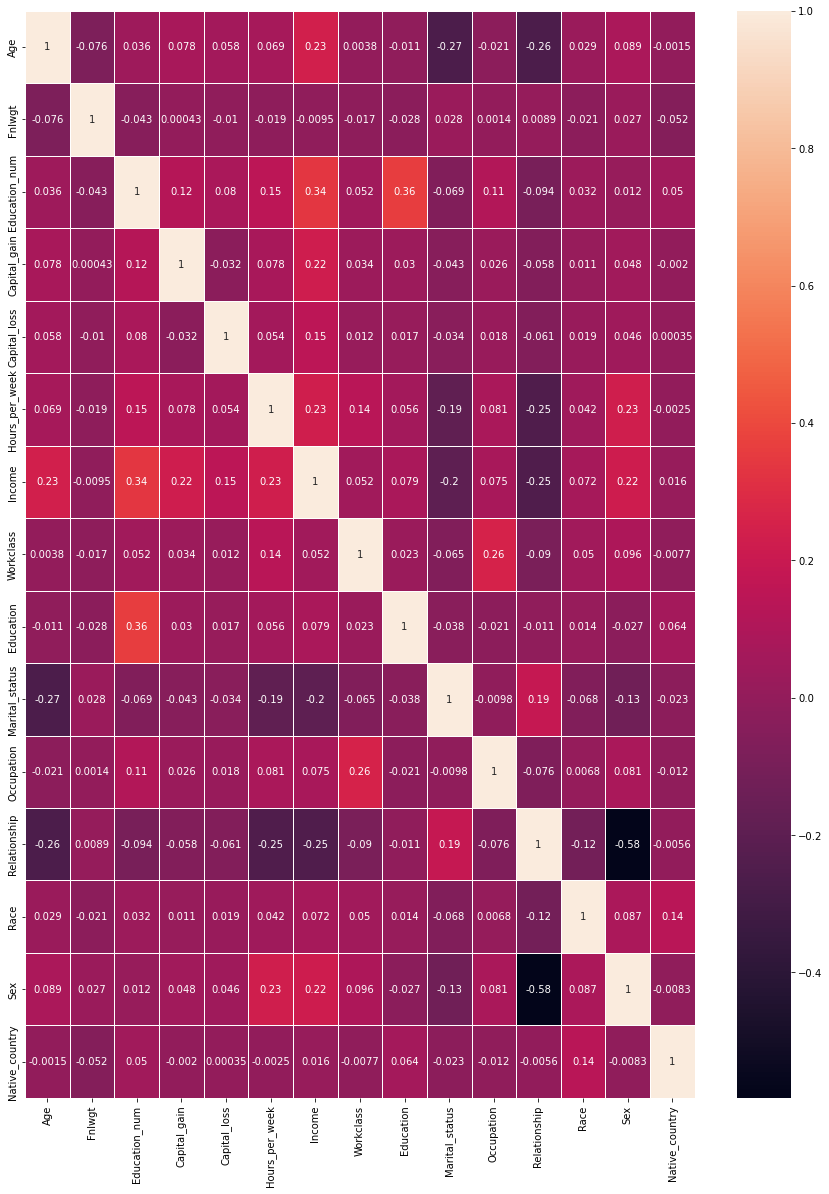

In [98]:
corr=data1.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr,annot=True,linewidths=0.5)
plt.show()

In [99]:
corr['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335299
Age               0.234039
Hours_per_week    0.229659
Capital_gain      0.223340
Sex               0.215984
Capital_loss      0.150498
Education         0.079361
Occupation        0.075398
Race              0.071855
Workclass         0.051706
Native_country    0.015623
Fnlwgt           -0.009521
Marital_status   -0.199187
Relationship     -0.250955
Name: Income, dtype: float64

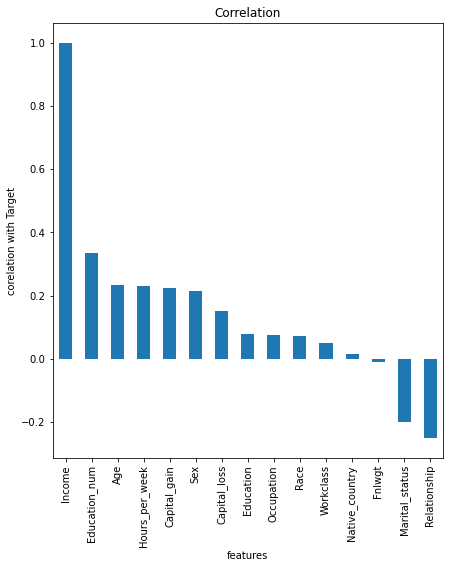

In [100]:
plt.figure(figsize=(7,8))
corr['Income'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('corelation with Target')
plt.title('Correlation')
plt.show()

In [101]:
#observations:
# the columns "education ,Occupation,race,Workclass,Native_country,Marital status ,Capital_lossand Fnlwgt columns are contributing 
#very less to the Target Variable."
#Checking with Select K Best feature method to see the best features.

# Selecting best Features using Kbest method.

In [102]:
# To Select the Best Features Using SelectK Best Method.
from sklearn.feature_selection import SelectKBest, f_classif

In [103]:
x1=data1.drop(columns=['Income'],axis=1)
x1

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,50,83311,13,0,0,13,6,9,2,4,0,4,1,39
1,38,215646,9,0,0,40,4,11,0,6,1,4,1,39
2,53,234721,7,0,0,40,4,1,2,6,0,2,1,39
3,28,338409,13,0,0,40,4,9,2,10,5,2,0,5
4,37,284582,14,0,0,40,4,12,2,4,5,4,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,4,7,2,13,5,4,0,39
32556,40,154374,9,0,0,40,4,11,2,7,0,4,1,39
32557,58,151910,9,0,0,40,4,11,6,1,4,4,0,39
32558,22,201490,9,0,0,20,4,11,4,1,3,4,1,39


In [104]:
y=data1['Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32536, dtype: int32

In [105]:
best_feature=SelectKBest(score_func=f_classif,k='all')
fit=best_feature.fit(x1,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x1.columns)
best_score=pd.concat([score,columns],axis=1)
best_score.columns=['score','columnname']
best_score

,score,columnname
0,1885.286977,Age
1,2.949442,Fnlwgt
2,4120.959861,Education_num
3,1708.021444,Capital_gain
4,753.959104,Capital_loss
5,1811.486632,Hours_per_week
6,87.213326,Workclass
7,206.203986,Education
8,1344.129315,Marital_status
9,186.010145,Occupation


In [106]:
best_score.sort_values('score',ascending=False)

,score,columnname
2,4120.959861,Education_num
10,2186.644675,Relationship
0,1885.286977,Age
5,1811.486632,Hours_per_week
3,1708.021444,Capital_gain
12,1591.944711,Sex
8,1344.129315,Marital_status
4,753.959104,Capital_loss
7,206.203986,Education
9,186.010145,Occupation


In [107]:
# after checking correlation and select K Best Features, and to avoid Multicollinearity decided to remove columns
#('Education','Occupation','Race','Workclass','Native_country'and 'Fnlwgt.')

In [108]:
data1.drop(columns=['Education','Occupation','Race','Workclass','Native_country','Fnlwgt','Capital_loss'],axis=1,inplace=True)
data1

,Age,Education_num,Capital_gain,Hours_per_week,Income,Marital_status,Relationship,Sex
0,50,13,0,13,0,2,0,1
1,38,9,0,40,0,0,1,1
2,53,7,0,40,0,2,0,1
3,28,13,0,40,0,2,5,0
4,37,14,0,40,0,2,5,0
...,...,...,...,...,...,...,...,...
32555,27,12,0,38,0,2,5,0
32556,40,9,0,40,1,2,0,1
32557,58,9,0,40,0,6,4,0
32558,22,9,0,20,0,4,3,1


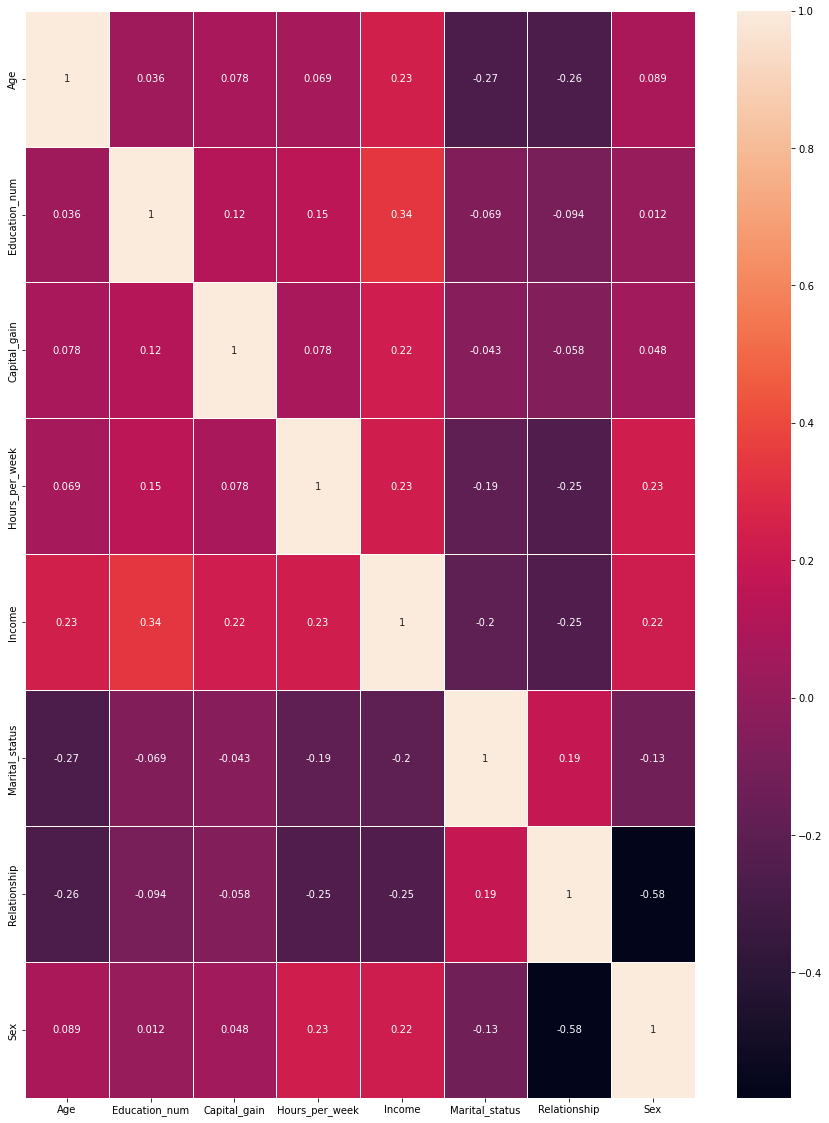

In [109]:
# After deleting the columns,we didnt see much multicollinearity.in heatmap.
corr1=data1.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr1,annot=True,linewidths=0.5)
plt.show()

# Outliers.

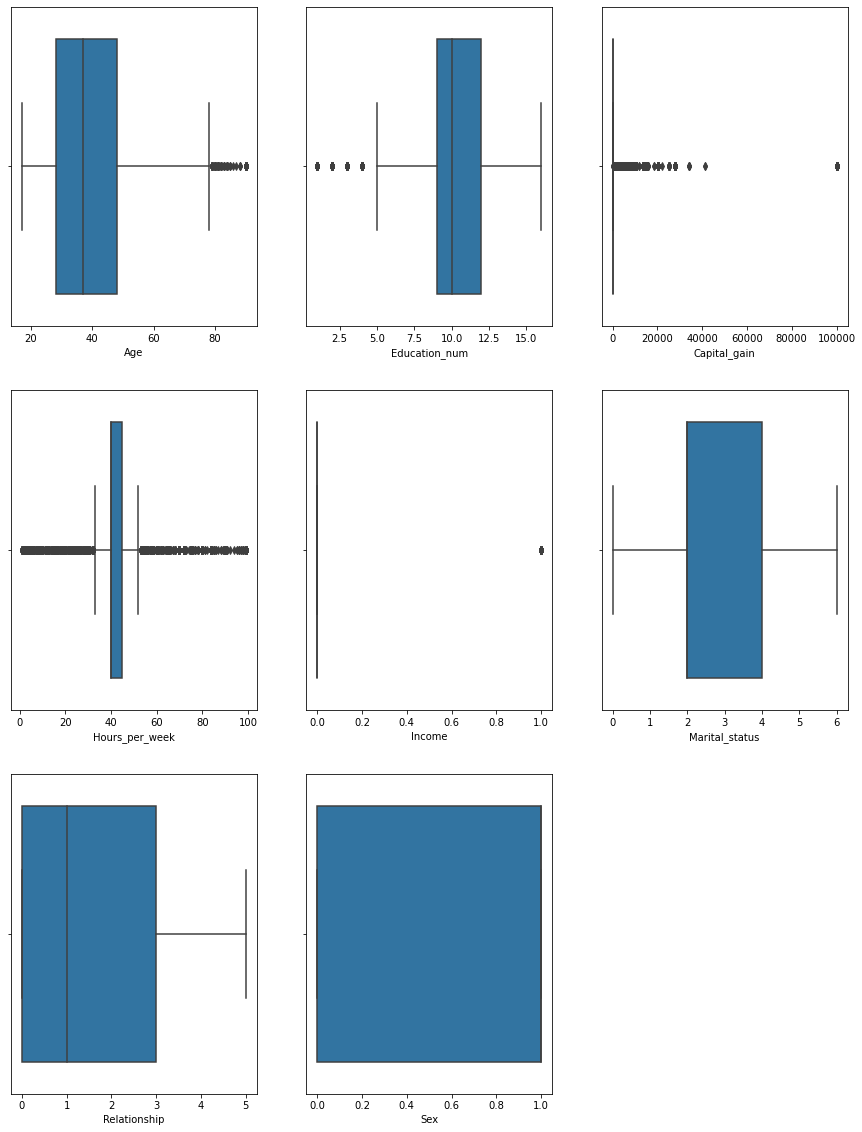

In [110]:
plt.figure(figsize=(15,20))
plotnumber=1
for columns in data1:
    if plotnumber<=8:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(x=data1[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.show()

In [111]:
#Removing outliers using zscore.

In [112]:
from scipy.stats import zscore

In [113]:
z=np.abs(zscore(data1))
z

,Age,Education_num,Capital_gain,Hours_per_week,Income,Marital_status,Relationship,Sex
0,0.836961,1.134817,0.145969,2.222450,0.563389,0.405890,0.900122,0.703036
1,0.042934,0.420646,0.145969,0.035664,0.563389,1.733664,0.277868,0.703036
2,1.056935,1.198377,0.145969,0.035664,0.563389,0.405890,0.900122,0.703036
3,0.776180,1.134817,0.145969,0.035664,0.563389,0.405890,2.211146,1.422403
4,0.116259,1.523683,0.145969,0.035664,0.563389,0.405890,2.211146,1.422403
...,...,...,...,...,...,...,...,...
32555,0.849505,0.745951,0.145969,0.197648,0.563389,0.405890,2.211146,1.422403
32556,0.103715,0.420646,0.145969,0.035664,1.774973,0.405890,0.900122,0.703036
32557,1.423558,0.420646,0.145969,0.035664,0.563389,2.249657,1.588892,1.422403
32558,1.216128,0.420646,0.145969,1.655506,0.563389,0.921884,0.966639,0.703036


In [114]:
new=data1[(z<3).all(axis=1)]
new

,Age,Education_num,Capital_gain,Hours_per_week,Income,Marital_status,Relationship,Sex
0,50,13,0,13,0,2,0,1
1,38,9,0,40,0,0,1,1
2,53,7,0,40,0,2,0,1
3,28,13,0,40,0,2,5,0
4,37,14,0,40,0,2,5,0
...,...,...,...,...,...,...,...,...
32555,27,12,0,38,0,2,5,0
32556,40,9,0,40,1,2,0,1
32557,58,9,0,40,0,6,4,0
32558,22,9,0,20,0,4,3,1


In [115]:
data1.shape

(32536, 8)

In [116]:
new.shape

(31566, 8)

In [117]:
dataloss=(32536-31566)/32536*100
dataloss

2.9813130071305634

In [118]:
# Data loss is not much,proceeding with new DataFrame after removing outliers.
# Rechecking the Same with boxplot.

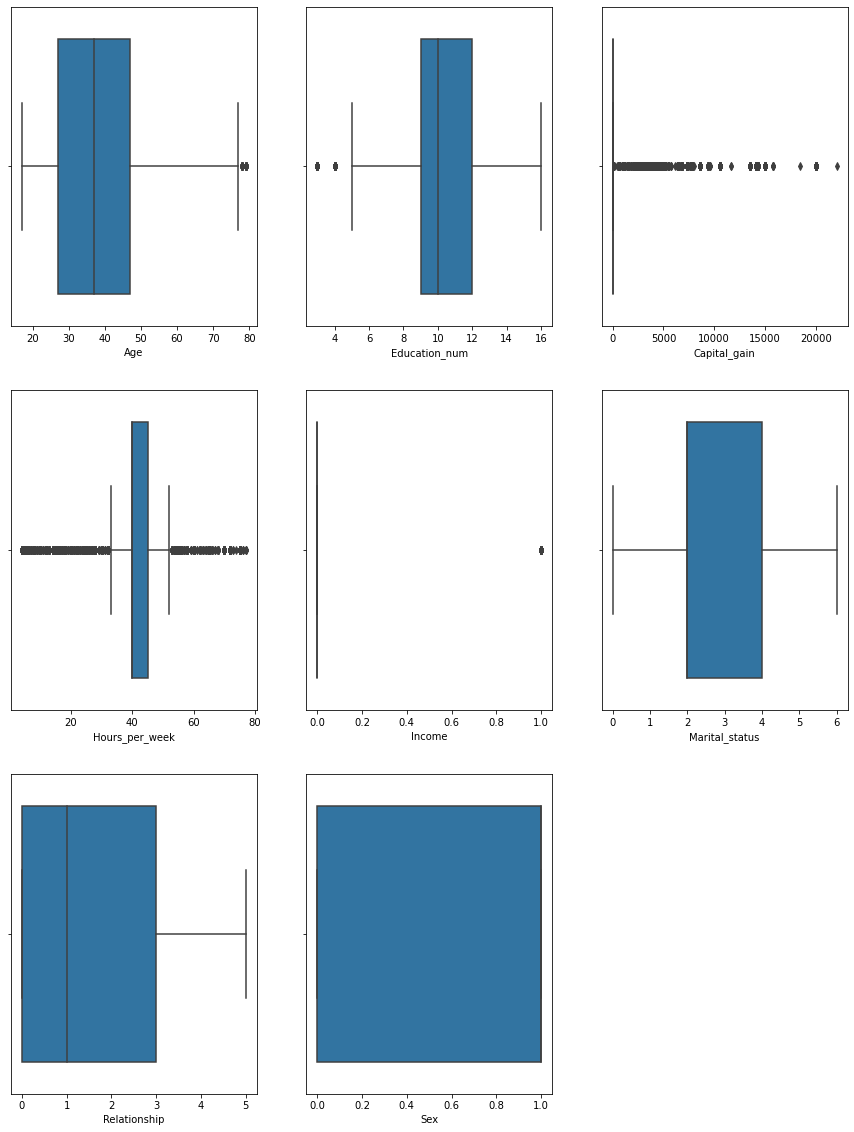

In [119]:
plt.figure(figsize=(15,20))
plotnumber=1
for columns in new:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(x=new[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.show()

# Skewness check

In [120]:
x=new.drop(columns='Income',axis=1)
x

,Age,Education_num,Capital_gain,Hours_per_week,Marital_status,Relationship,Sex
0,50,13,0,13,2,0,1
1,38,9,0,40,0,1,1
2,53,7,0,40,2,0,1
3,28,13,0,40,2,5,0
4,37,14,0,40,2,5,0
...,...,...,...,...,...,...,...
32555,27,12,0,38,2,5,0
32556,40,9,0,40,2,0,1
32557,58,9,0,40,6,4,0
32558,22,9,0,20,4,3,1


In [121]:
y=new['Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 31566, dtype: int32

In [122]:
x.skew()

Age               0.479575
Education_num    -0.166705
Capital_gain      5.068212
Hours_per_week   -0.348569
Marital_status   -0.030242
Relationship      0.771890
Sex              -0.704873
dtype: float64

In [123]:
# Since the skewness is high for 1 column,we will use Transformation method for removing skewness.

In [124]:
from sklearn.preprocessing import PowerTransformer

In [125]:
pt=PowerTransformer()
pwr=pt.fit_transform(x)
x_new=pd.DataFrame(data=pwr,columns=x.columns)
x_new

,Age,Education_num,Capital_gain,Hours_per_week,Marital_status,Relationship,Sex
0,0.922173,1.183671,-0.289373,-2.228824,-0.385153,-1.099050,0.707863
1,0.117562,-0.477575,-0.289373,-0.049016,-1.777441,0.122039,0.707863
2,1.099123,-1.256462,-0.289373,-0.049016,-0.385153,-1.099050,0.707863
3,-0.723420,1.183671,-0.289373,-0.049016,-0.385153,1.546821,-1.412703
4,0.041867,1.617396,-0.289373,-0.049016,-0.385153,1.546821,-1.412703
...,...,...,...,...,...,...,...
31561,-0.819847,0.756870,-0.289373,-0.231796,-0.385153,1.546821,-1.412703
31562,0.264382,-0.477575,-0.289373,-0.049016,-0.385153,-1.099050,0.707863
31563,1.377194,-0.477575,-0.289373,-0.049016,2.182220,1.346200,-1.412703
31564,-1.348325,-0.477575,-0.289373,-1.733043,0.921494,1.082800,0.707863


In [126]:
# After removing skewness with powerTransformer,checking the same

x_new.skew()

Age              -0.018737
Education_num     0.020538
Capital_gain      3.166525
Hours_per_week    0.108805
Marital_status   -0.119299
Relationship      0.117637
Sex              -0.704873
dtype: float64

In [127]:
# though the skewness is removed,still ill check the same with quantile transformer method.
from sklearn.preprocessing import QuantileTransformer

In [128]:
qt=QuantileTransformer()
qua=qt.fit_transform(x)
x_qua=pd.DataFrame(data=qua,columns=x.columns)
x_qua

,Age,Education_num,Capital_gain,Hours_per_week,Marital_status,Relationship,Sex
0,0.798799,0.837337,0.000000,0.025526,0.366867,0.000000,1.0
1,0.531031,0.287788,0.000000,0.475475,0.000000,0.529530,1.0
2,0.847347,0.093093,0.000000,0.475475,0.366867,0.000000,1.0
3,0.264264,0.837337,0.000000,0.475475,0.366867,1.000000,0.0
4,0.505005,0.946446,0.000000,0.475475,0.366867,1.000000,0.0
...,...,...,...,...,...,...,...
31561,0.237738,0.737738,0.000000,0.228228,0.366867,1.000000,0.0
31562,0.581081,0.287788,0.000000,0.475475,0.366867,0.000000,1.0
31563,0.907908,0.287788,0.000000,0.475475,1.000000,0.897898,0.0
31564,0.109610,0.287788,0.000000,0.068569,0.773774,0.765265,1.0


In [129]:
# after removing the skewness through quantile Transformer,rechecking the skewness

In [130]:
x_qua.skew()

Age              -0.000963
Education_num     0.056656
Capital_gain      3.169780
Hours_per_week    0.028750
Marital_status   -0.115826
Relationship     -0.028500
Sex              -0.704873
dtype: float64

In [131]:
# Using Power Transformer Method x_new further

In [132]:
x_new.shape

(31566, 7)

In [133]:
y.shape

(31566,)

# Multicollinearity using VIF 

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler=StandardScaler()
x_scale=scaler.fit_transform(x_new)
x_scale

array([[ 0.92217337,  1.18367129, -0.28937301, ..., -0.38515344,
        -1.09904989,  0.70786295],
       [ 0.11756218, -0.47757466, -0.28937301, ..., -1.77744062,
         0.12203873,  0.70786295],
       [ 1.0991234 , -1.25646156, -0.28937301, ..., -0.38515344,
        -1.09904989,  0.70786295],
       ...,
       [ 1.37719418, -0.47757466, -0.28937301, ...,  2.18222011,
         1.3461996 , -1.41270285],
       [-1.3483247 , -0.47757466, -0.28937301, ...,  0.921494  ,
         1.08280003,  0.70786295],
       [ 1.04103922, -0.47757466,  3.45577063, ..., -0.38515344,
         1.54682057, -1.41270285]])

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scale,i) for i in range(x_scale.shape[1])]
vif['Columns']=x_new.columns
vif

,VIF,Columns
0,1.267464,Age
1,1.045589,Education_num
2,1.026243,Capital_gain
3,1.139127,Hours_per_week
4,1.170463,Marital_status
5,1.925002,Relationship
6,1.644655,Sex


In [138]:
# Multicollinearity is not present in our columns,as the VIF Values is less than 10,so we can proceed with Model Building

# SMOTE for Classification.

In [139]:
y.value_counts()

0    24085
1     7481
Name: Income, dtype: int64

In [140]:
from imblearn.over_sampling import SMOTE

In [141]:
sm=SMOTE()
x_new,y1=sm.fit_resample(x_scale,y)

In [142]:
x_new.shape

(48170, 7)

In [143]:
y1.value_counts()

0    24085
1    24085
Name: Income, dtype: int64

In [144]:
y1.shape

(48170,)

#  PCA

In [145]:
from sklearn.decomposition import PCA

In [146]:
pca=PCA()

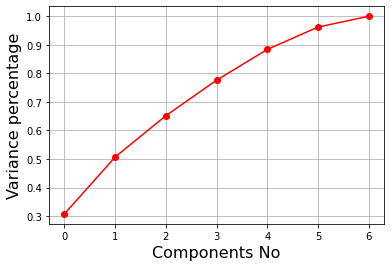

In [147]:
x_pca = pca.fit_transform(x_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Components No', fontsize= 16)
plt.ylabel('Variance percentage', fontsize= 16)
plt.grid()
plt.show()

In [148]:
pca_new=PCA(n_components=5)
comp=pca_new.fit_transform(x_new)
comp

array([[-0.33174012, -0.41548551, -0.03505329,  0.82580055, -2.73359016],
       [-0.10572845, -0.6401216 ,  0.5518875 ,  0.94725874,  0.38861087],
       [-0.54802393, -0.97997719,  1.53560328,  0.78582627, -0.02792109],
       ...,
       [-0.51970847, -0.86688035,  0.87599351,  0.20553243, -0.23948665],
       [ 0.52700514, -0.34915339, -0.04138099, -1.15388569, -0.3668795 ],
       [-1.75250558,  2.50214814,  1.66925217, -0.48177756,  0.32458013]])

In [149]:
x2=pd.DataFrame(comp)
x2

,0,1,2,3,4
0,-0.331740,-0.415486,-0.035053,0.825801,-2.733590
1,-0.105728,-0.640122,0.551887,0.947259,0.388611
2,-0.548024,-0.979977,1.535603,0.785826,-0.027921
3,1.864947,0.604542,-1.742493,0.242510,0.383165
4,1.498102,0.652620,-2.129573,0.684354,0.135386
...,...,...,...,...,...
48165,-1.225703,-0.745275,-0.784463,-0.424180,-0.038459
48166,0.019523,-0.120024,-1.044444,1.223396,0.012864
48167,-0.519708,-0.866880,0.875994,0.205532,-0.239487
48168,0.527005,-0.349153,-0.041381,-1.153886,-0.366880


In [150]:
# Observations:
# as per PCA,five columns giving 95% data variance.


In [151]:
x_new.shape

(48170, 7)

In [152]:
x2.shape

(48170, 5)

In [153]:
y1.shape

(48170,)

# Model Building

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [155]:
# To select Random state,and to find where the accuracy rate is high.

In [156]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x2,y1,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At Random State",i)
        print("The Training score is:",accuracy_score(y_train,pred_train)*100)
        print("The Test Score is :",accuracy_score(y_test,pred_test)*100)

At Random State 0
The Training score is: 76.66565172862401
The Test Score is : 76.98247944864237
At Random State 1
The Training score is: 76.7763722423672
The Test Score is : 76.89944366021756
At Random State 2
The Training score is: 76.77914025521079
The Test Score is : 76.84962218716267
At Random State 3
The Training score is: 76.68225980568549
The Test Score is : 76.94096155442995
At Random State 5
The Training score is: 76.64350762587539
The Test Score is : 77.38935481192394
At Random State 6
The Training score is: 76.72101198549561
The Test Score is : 76.75828281989537
At Random State 8
The Training score is: 76.63520358734465
The Test Score is : 76.9741758697999
At Random State 9
The Training score is: 76.89539679464113
The Test Score is : 76.67524703147056
At Random State 10
The Training score is: 76.82342846070806
The Test Score is : 77.09872955243709
At Random State 11
The Training score is: 76.83726852492595
The Test Score is : 76.71676492568297
At Random State 12
The Trainin

In [157]:
# Choosing random_state=99,and fitting the Model.

In [157]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x2,y1,test_size=0.25,random_state=99)

In [158]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test)*100)
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

76.8330150294777
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      6060
           1       0.76      0.79      0.77      5983

    accuracy                           0.77     12043
   macro avg       0.77      0.77      0.77     12043
weighted avg       0.77      0.77      0.77     12043

[[4552 1508]
 [1282 4701]]


# Cross_validation

In [159]:
from sklearn.model_selection import cross_val_score

In [160]:
for j in range(2,10):
    lss_score=cross_val_score(lr,x2,y1,cv=j)
    print(lss_score)
    lsc_score=lss_score.mean()
    print("At CV Fold,:",j)
    print("Cross Valid Score is:",lsc_score*100)
    print("Accuracy Score is :",accuracy_score(y_test,pred_test)*100)

[0.76611999 0.77006436]
At CV Fold,: 2
Cross Valid Score is: 76.80921735520033
Accuracy Score is : 76.8330150294777
[0.76764028 0.76141247 0.77485052]
At CV Fold,: 3
Cross Valid Score is: 76.79677575828437
Accuracy Score is : 76.8330150294777
[0.76741676 0.7642614  0.76656702 0.77370869]
At CV Fold,: 4
Cross Valid Score is: 76.79884637486862
Accuracy Score is : 76.8330150294777
[0.76759394 0.76437617 0.76458377 0.76863193 0.77465227]
At CV Fold,: 5
Cross Valid Score is: 76.79676146979448
Accuracy Score is : 76.8330150294777
[0.76522606 0.76983435 0.76195815 0.76096163 0.77441455 0.77541106]
At CV Fold,: 6
Cross Valid Score is: 76.79676328598649
Accuracy Score is : 76.8330150294777
[0.76532985 0.7731764  0.7555943  0.76369714 0.77067287 0.77125418
 0.77532335]
At CV Fold,: 7
Cross Valid Score is: 76.78640126943309
Accuracy Score is : 76.8330150294777
[0.76170707 0.77349718 0.76299618 0.76532138 0.76183358 0.7717987
 0.7752865  0.77279522]
At CV Fold,: 8
Cross Valid Score is: 76.81544759

In [161]:
# choosing cv=6 and checking with the other models.

In [162]:
# Defining a Function for getting Model score:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvs=cross_val_score(algorithm,x2,y1,cv=6)
    cvc=cvs.mean()
    print("The Model Name is ",algorithm)
    print("The Accuracy score of the Model Training Data:",accuracy_score(y_train,pred_algo_train)*100)
    print("The Accuracy score of the Model Test Data:",accuracy_score(y_test,pred_algo_test)*100)
    print("The Cross Valid Score of the Algorithm:",cvc*100)
    print("The Classification report of the Model is :",classification_report(y_test,pred_algo_test))
    print("The Confusion Matrix is :",confusion_matrix(y_test,pred_algo_test))
    print("The Difference between Cross Val score and Accuracy score is: ",(cvc*100-accuracy_score(y_test,pred_algo_test)*100))
    

In [163]:
# Training the Model with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [164]:
dt=DecisionTreeClassifier()

In [165]:
model_selection(dt,x_train,x_test,y_train,y_test)

The Model Name is  DecisionTreeClassifier()
The Accuracy score of the Model Training Data: 92.44332493702771
The Accuracy score of the Model Test Data: 80.98480445071826
The Cross Valid Score of the Algorithm: 81.44292853536307
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.82      0.80      0.81      6060
           1       0.80      0.82      0.81      5983

    accuracy                           0.81     12043
   macro avg       0.81      0.81      0.81     12043
weighted avg       0.81      0.81      0.81     12043

The Confusion Matrix is : [[4818 1242]
 [1048 4935]]
The Difference between Cross Val score and Accuracy score is:  0.45812408464480825


In [166]:
# Training the Model with K Neighbor Classifier.
from sklearn.neighbors import KNeighborsClassifier

In [167]:
knc=KNeighborsClassifier()

In [168]:
model_selection(knc,x_train,x_test,y_train,y_test)

The Model Name is  KNeighborsClassifier()
The Accuracy score of the Model Training Data: 85.4845406482686
The Accuracy score of the Model Test Data: 81.87328738686374
The Cross Valid Score of the Algorithm: 79.41674160573336
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.85      0.78      0.81      6060
           1       0.79      0.86      0.82      5983

    accuracy                           0.82     12043
   macro avg       0.82      0.82      0.82     12043
weighted avg       0.82      0.82      0.82     12043

The Confusion Matrix is : [[4739 1321]
 [ 862 5121]]
The Difference between Cross Val score and Accuracy score is:  -2.456545781130373


In [169]:
# Training the Model with Ensemble Techniques.

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [171]:
rf=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()

In [172]:
model_selection(rf,x_train,x_test,y_train,y_test)

model_selection(gbc,x_train,x_test,y_train,y_test)

model_selection(ada,x_train,x_test,y_train,y_test)

model_selection(xgb,x_train,x_test,y_train,y_test)

The Model Name is  RandomForestClassifier()
The Accuracy score of the Model Training Data: 92.44332493702771
The Accuracy score of the Model Test Data: 82.96105621522877
The Cross Valid Score of the Algorithm: 83.4213421331894
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.85      0.80      0.83      6060
           1       0.81      0.86      0.83      5983

    accuracy                           0.83     12043
   macro avg       0.83      0.83      0.83     12043
weighted avg       0.83      0.83      0.83     12043

The Confusion Matrix is : [[4861 1199]
 [ 853 5130]]
The Difference between Cross Val score and Accuracy score is:  0.4602859179606327
The Model Name is  GradientBoostingClassifier()
The Accuracy score of the Model Training Data: 81.31037728015058
The Accuracy score of the Model Test Data: 81.04292950261562
The Cross Valid Score of the Algorithm: 80.86985696200219
The Classification report of the Mo

In [173]:
# Out of all the Models,choosing XGBClassifier for hyperTuning 
#as the difference between the cross validation and model score is less out of all models.

# HyperTuning

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
params={'max_depth':range(2,4),'gamma':np.arange(0.1,0.3),'max_leaves':range(2,4)}

In [178]:
grd=GridSearchCV(xgb,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'gamma': 0.1, 'max_depth': 3, 'max_leaves': 2}


In [179]:
grd_xgb=XGBClassifier(gamma= 0.1, max_depth= 3, max_leaves= 2)


In [180]:
model_selection(grd_xgb,x_train,x_test,y_train,y_test)

The Model Name is  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
The Accuracy score of the Model Training Data: 82.31516594236997
The Accuracy score of the Model Test Data: 81.32525118325998
The Cross Valid Score of the Algorithm: 81.30788410695831
The Classification report of the Model is :         

In [181]:
# Default Xgb gives best score comparing to the hyper Tune.so saving the Model with default xgb 

# AUC_ROC_CURVE.

In [184]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.metrics import plot_roc_curve

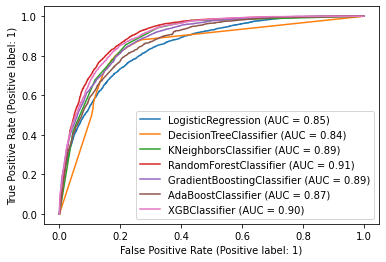

In [185]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

# Model Saving

In [186]:
import pickle
filename='census_income_project.pkl'
pickle.dump(xgb,open(filename,'wb'))

In [187]:
loaded_model=pickle.load(open('census_income_project.pkl','rb'))
loaded_model.score(x_test,y_test)*100

82.3715021174126

# conclusion

In [191]:
a=np.array(y_test)
predict=loaded_model.predict(x_test)
b=np.array(predict)
conclusion=pd.DataFrame({'Actual':a,'predicted':b})
conclusion

,Actual,predicted
0,0,0
1,0,0
2,0,1
3,1,0
4,0,0
...,...,...
12038,0,0
12039,1,1
12040,0,0
12041,0,0
